
**
*   ⭐️Preprocessing for the mortality dataset
: (includes sample, missing values and its finding i.e., data scarcity occurs in developed countries, it is not random; thus it is difficult to predict the values with the existing data which is mainly come from developing countries. )
*   ⭐️Preprocessing for the breastfeeding dataset (includes a search algorithm and its effect i.e., whether the cost function is 0.)
*   ⭐️Cleaning dataset (includes merging two datasets, variable selection, sample and its finding: imbalanced data.)
*   ⭐️Feature engineering (includes one-hot encoding.)
*   ⭐️Validation (imbalanced data; therefore, it requires 5-fold cross-validation not simply splitting.)
*   ⭐️Model building (includs 3 models and their parameters.)
*   ⭐️Model evaluation (includes these models' metrics and results.)

**





# ⭐️Preprocessing for the mortality dataset

## Missing values
// Purpose: There is a problem of data scarcity; thus, it is important to confirm whether there is a pattern.

// Results: Missing values in developed coutries are more than in developing countries.

// Potential apploaches: 1)use the other values or predict it to fill in the missing values, 2)delete the rows with missing values.

// Decision: This project employs the second approach. The main reason is sample size after deleting these rows is over 300, meaning it is applicable to implement a machine learning. Additionally, the first approach has the risk that might cause bias by predicting the values with the existing data (in mainly the developing countries).

## // Start of the section: Preprocessing for the mortality datasets

In [1]:
import pandas as pd

In [ ]:
# File path
africa_file = "Child mortality rates_Africa.csv"
americas_file = "Child mortality rates_Americas.csv"
eastern_mediterranean_file = "Child mortality rates_Eastern_Mediterranean.csv"
europe_file = "Child mortality rates_Europe.csv"
western_pacific_file = "Child mortality rates_Western_Pacific.csv"
south_east_asia_file = "Child mortality rates_South_East_Asia.csv"
infant_nutrition_file = "Infant nutrition data by country.csv"

In [ ]:
# Read csv(s)
df_africa = pd.read_csv(africa_file, header=[0,1])
df_americas = pd.read_csv(americas_file, header=[0,1])
df_eastern_mediterranean = pd.read_csv(eastern_mediterranean_file, header=[0,1])
df_europe = pd.read_csv(europe_file, header=[0,1])
df_south_east_asia = pd.read_csv(south_east_asia_file, header=[0,1])
df_western_pacific = pd.read_csv(western_pacific_file, header=[0,1])

In [ ]:
# Display column
# Look at the columns' name
print("df_africa.columns.values:", df_africa.columns.values)

df_africa.columns.values: [('Unnamed: 0_level_0', 'Countries, territories and areas')
 ('Unnamed: 1_level_0', 'Year')
 ('Under-five mortality rate (per 1000 live births) (SDG 3.2.1)', ' Both sexes')
 ('Under-five mortality rate (per 1000 live births) (SDG 3.2.1)', ' Male')
 ('Under-five mortality rate (per 1000 live births) (SDG 3.2.1)', ' Female')
 ('Number of deaths among children under-five', ' Both sexes')
 ('Number of deaths among children under-five', ' Male')
 ('Number of deaths among children under-five', ' Female')]


In [ ]:
# Organise Column
if len(df_africa.columns.values[0]) == 2:
    df_africa.columns = [f'{i}_{j}' for i, j in df_africa.columns.values]
else:
    df_africa.columns = [f'{i}' if isinstance(i, str) else '_'.join([str(x) for x in i]) for i in df_africa.columns.values]

# Organise column
for df in [df_americas, df_eastern_mediterranean, df_europe, df_south_east_asia, df_western_pacific]:
    if len(df.columns.values[0]) == 2:
        df.columns = [f'{i}_{j}' for i, j in df.columns.values]
    else:
        df.columns = [f'{i}' if isinstance(i, str) else '_'.join([str(x) for x in i]) for i in df.columns.values]
print(df_africa.columns)
print(df_europe.columns)

Index(['Unnamed: 0_level_0_Countries, territories and areas',
       'Unnamed: 1_level_0_Year',
       'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Both sexes',
       'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Male',
       'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Female',
       'Number of deaths among children under-five_ Both sexes',
       'Number of deaths among children under-five_ Male',
       'Number of deaths among children under-five_ Female'],
      dtype='object')
Index(['Unnamed: 0_level_0_Countries, territories and areas',
       'Unnamed: 1_level_0_Year',
       'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Both sexes',
       'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Male',
       'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Female',
       'Number of deaths among children under-five_ Both sexes',
       'Number of deaths among children under-five_ Male'

In [ ]:
# To simplify and organise the each column's name (Africa data set)
df_africa = df_africa.rename({'Unnamed: 0_level_0_Countries, territories and areas': 'Country',
                              'Unnamed: 1_level_0_Year': 'Year',
                              'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Both sexes': 'UFMR(per1000births)_Both',
                              'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Male': 'UFMR(per1000births)_Male',
                              'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Female': 'UFMR(per1000births)_Female',
                              'Number of deaths among children under-five_ Both sexes': 'Number_of_deaths_UF_Both',
                              'Number of deaths among children under-five_ Male': 'Number_of_deaths_UF_Male',
                              'Number of deaths among children under-five_ Female': 'Number_of_deaths_UF_Female',
                             }, axis='columns')
df_africa.head()

,Country,Year,UFMR(per1000births)_Both,UFMR(per1000births)_Male,UFMR(per1000births)_Female,Number_of_deaths_UF_Both,Number_of_deaths_UF_Male,Number_of_deaths_UF_Female
0,Algeria,2021,22.34 [19.71-25.37],23.98 [21.11-27.34],20.6 [18.07-23.5],21 567 [19 036-24 499],11 834 [10 414-13 487],9 733 [8 538-11 097]
1,Algeria,2020,22.9 [20.73-25.37],24.58 [22.19-27.29],21.14 [19.07-23.52],22 565 [20 434-24 999],12 373 [11 175-13 738],10 192 [9 191-11 335]
2,Algeria,2019,23.45 [21.73-25.36],25.13 [23.19-27.31],21.68 [19.98-23.59],23 456 [21 738-25 363],12 847 [11 849-13 951],10 609 [9 773-11 540]
3,Algeria,2018,23.98 [22.63-25.44],25.67 [24.1-27.38],22.2 [20.81-23.77],24 191 [22 834-25 660],13 234 [12 421-14 109],10 957 [10 269-11 728]
4,Algeria,2017,24.48 [23.41-25.61],26.18 [24.88-27.57],22.68 [21.51-23.96],24 709 [23 624-25 848],13 506 [12 828-14 210],11 203 [10 619-11 830]


In [ ]:
# To simplify and organise the each column's name (Other's data sets)
df_americas = df_americas.rename({'Unnamed: 0_level_0_Countries, territories and areas': 'Country',
                              'Unnamed: 1_level_0_Year': 'Year',
                              'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Both sexes': 'UFMR(per1000births)_Both',
                              'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Male': 'UFMR(per1000births)_Male',
                              'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Female': 'UFMR(per1000births)_Female',
                              'Number of deaths among children under-five_ Both sexes': 'Number_of_deaths_UF_Both',
                              'Number of deaths among children under-five_ Male': 'Number_of_deaths_UF_Male',
                              'Number of deaths among children under-five_ Female': 'Number_of_deaths_UF_Female',
                             }, axis='columns')
df_eastern_mediterranean = df_eastern_mediterranean.rename({'Unnamed: 0_level_0_Countries, territories and areas': 'Country',
                              'Unnamed: 1_level_0_Year': 'Year',
                              'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Both sexes': 'UFMR(per1000births)_Both',
                              'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Male': 'UFMR(per1000births)_Male',
                              'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Female': 'UFMR(per1000births)_Female',
                              'Number of deaths among children under-five_ Both sexes': 'Number_of_deaths_UF_Both',
                              'Number of deaths among children under-five_ Male': 'Number_of_deaths_UF_Male',
                              'Number of deaths among children under-five_ Female': 'Number_of_deaths_UF_Female',
                             }, axis='columns')
df_europe = df_europe.rename ({'Unnamed: 0_level_0_Countries, territories and areas': 'Country',
                              'Unnamed: 1_level_0_Year': 'Year',
                              'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Both sexes': 'UFMR(per1000births)_Both',
                              'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Male': 'UFMR(per1000births)_Male',
                              'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Female': 'UFMR(per1000births)_Female',
                              'Number of deaths among children under-five_ Both sexes': 'Number_of_deaths_UF_Both',
                              'Number of deaths among children under-five_ Male': 'Number_of_deaths_UF_Male',
                              'Number of deaths among children under-five_ Female': 'Number_of_deaths_UF_Female',
                             }, axis='columns')
df_south_east_asia = df_south_east_asia.rename({'Unnamed: 0_level_0_Countries, territories and areas': 'Country',
                              'Unnamed: 1_level_0_Year': 'Year',
                              'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Both sexes': 'UFMR(per1000births)_Both',
                              'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Male': 'UFMR(per1000births)_Male',
                              'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Female': 'UFMR(per1000births)_Female',
                              'Number of deaths among children under-five_ Both sexes': 'Number_of_deaths_UF_Both',
                              'Number of deaths among children under-five_ Male': 'Number_of_deaths_UF_Male',
                              'Number of deaths among children under-five_ Female': 'Number_of_deaths_UF_Female',
                             }, axis='columns')
df_western_pacific = df_western_pacific.rename({'Unnamed: 0_level_0_Countries, territories and areas': 'Country',
                              'Unnamed: 1_level_0_Year': 'Year',
                              'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Both sexes': 'UFMR(per1000births)_Both',
                              'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Male': 'UFMR(per1000births)_Male',
                              'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Female': 'UFMR(per1000births)_Female',
                              'Number of deaths among children under-five_ Both sexes': 'Number_of_deaths_UF_Both',
                              'Number of deaths among children under-five_ Male': 'Number_of_deaths_UF_Male',
                              'Number of deaths among children under-five_ Female': 'Number_of_deaths_UF_Female',
                             }, axis='columns')

df_americas.head()

,Country,Year,UFMR(per1000births)_Both,UFMR(per1000births)_Male,UFMR(per1000births)_Female,Number_of_deaths_UF_Both,Number_of_deaths_UF_Male,Number_of_deaths_UF_Female
0,Anguilla,2021,4.05 [1.92-8.52],4.01 [1.91-8.44],4.06 [1.91-8.59],1 [0-1],0 [0-1],1 [0-1]
1,Anguilla,2020,4.18 [2.03-8.62],4.15 [2.01-8.55],4.21 [2.03-8.68],1 [0-1],0 [0-1],1 [0-1]
2,Anguilla,2019,4.33 [2.13-8.72],4.28 [2.11-8.64],4.39 [2.15-8.86],1 [0-1],0 [0-1],1 [0-1]
3,Anguilla,2018,4.49 [2.27-8.83],4.43 [2.25-8.72],4.54 [2.29-8.96],1 [0-1],0 [0-1],1 [0-1]
4,Anguilla,2017,4.64 [2.41-8.96],4.55 [2.37-8.77],4.73 [2.44-9.11],1 [0-1],0 [0-1],1 [0-1]


In [ ]:
# Confirm shapes
print(df_africa.shape)
print(df_americas.shape)
print(df_eastern_mediterranean.shape)
print(df_europe.shape)
print(df_south_east_asia.shape)
print(df_western_pacific.shape)

(3054, 8)
(2586, 8)
(1364, 8)
(3017, 8)
(670, 8)
(1777, 8)


In [ ]:
# Merge six datasets into one dataset as df_ufmr
dataframes = [df_africa, df_americas, df_eastern_mediterranean, df_europe, df_south_east_asia, df_western_pacific]
df_ufmr = pd.concat(dataframes, axis=0, ignore_index=True)
# Confirm shape
df_ufmr.shape

(12468, 8)

In [ ]:
# See whether this is successful merge
sum = df_africa.shape[0] + df_americas.shape[0]+ df_eastern_mediterranean.shape[0] + df_europe.shape[0] + df_south_east_asia.shape[0] + df_western_pacific.shape[0]

if sum==df_ufmr.shape[0]:
    print('This merge was successful.')

This merge was successful.


In [ ]:
# Check information of df_ufmr.
df_ufmr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12468 entries, 0 to 12467
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Country                     12468 non-null  object
 1   Year                        12468 non-null  int64 
 2   UFMR(per1000births)_Both    12468 non-null  object
 3   UFMR(per1000births)_Male    12169 non-null  object
 4   UFMR(per1000births)_Female  12169 non-null  object
 5   Number_of_deaths_UF_Both    11174 non-null  object
 6   Number_of_deaths_UF_Male    11174 non-null  object
 7   Number_of_deaths_UF_Female  11174 non-null  object
dtypes: int64(1), object(7)
memory usage: 779.4+ KB


In [ ]:
df_ufmr.head(10)

,Country,Year,UFMR(per1000births)_Both,UFMR(per1000births)_Male,UFMR(per1000births)_Female,Number_of_deaths_UF_Both,Number_of_deaths_UF_Male,Number_of_deaths_UF_Female
0,Algeria,2021,22.34 [19.71-25.37],23.98 [21.11-27.34],20.6 [18.07-23.5],21 567 [19 036-24 499],11 834 [10 414-13 487],9 733 [8 538-11 097]
1,Algeria,2020,22.9 [20.73-25.37],24.58 [22.19-27.29],21.14 [19.07-23.52],22 565 [20 434-24 999],12 373 [11 175-13 738],10 192 [9 191-11 335]
2,Algeria,2019,23.45 [21.73-25.36],25.13 [23.19-27.31],21.68 [19.98-23.59],23 456 [21 738-25 363],12 847 [11 849-13 951],10 609 [9 773-11 540]
3,Algeria,2018,23.98 [22.63-25.44],25.67 [24.1-27.38],22.2 [20.81-23.77],24 191 [22 834-25 660],13 234 [12 421-14 109],10 957 [10 269-11 728]
4,Algeria,2017,24.48 [23.41-25.61],26.18 [24.88-27.57],22.68 [21.51-23.96],24 709 [23 624-25 848],13 506 [12 828-14 210],11 203 [10 619-11 830]
5,Algeria,2016,24.92 [24.07-25.8],26.64 [25.54-27.78],23.11 [22.1-24.19],24 937 [24 083-25 816],13 624 [13 050-14 201],11 313 [10 814-11 838]
6,Algeria,2015,25.3 [24.65-25.98],27.03 [26.09-28.01],23.49 [22.61-24.41],24 898 [24 251-25 564],13 595 [13 116-14 085],11 303 [10 876-11 742]
7,Algeria,2014,25.67 [25.12-26.23],27.4 [26.53-28.29],23.85 [23.03-24.69],24 655 [24 127-25 197],13 459 [13 032-13 892],11 196 [10 811-11 592]
8,Algeria,2013,26.05 [25.5-26.62],27.79 [26.92-28.68],24.22 [23.38-25.08],24 470 [23 951-25 002],13 355 [12 935-13 781],11 115 [10 726-11 507]
9,Algeria,2012,26.49 [25.81-27.21],28.25 [27.29-29.26],24.65 [23.73-25.61],24 174 [23 551-24 822],13 188 [12 738-13 657],10 986 [10 574-11 415]


In [ ]:
# Extract numerical data from each column (Number_of_deaths_UF_Both	, Number_of_deaths_UF_Male,  Number_of_deaths_UF_Female)
import re

columns_to_fix = [
    'Number_of_deaths_UF_Both',
    'Number_of_deaths_UF_Male',
    'Number_of_deaths_UF_Female'
]


def remove_spaces_and_extract_number(value):
    if isinstance(value, str):
        cleaned_value = re.sub(r'\s+', '', re.split(r"\[|\]", value)[0])
        return cleaned_value
    return value

for col in columns_to_fix:
    if col in df_ufmr.columns:
        df_ufmr[col] = df_ufmr[col].apply(remove_spaces_and_extract_number)

for col in columns_to_fix:
    df_ufmr[col] = pd.to_numeric(df_ufmr[col], errors='coerce')

print(df_ufmr[columns_to_fix].head())

   Number_of_deaths_UF_Both  Number_of_deaths_UF_Male  \
0                   21567.0                   11834.0   
1                   22565.0                   12373.0   
2                   23456.0                   12847.0   
3                   24191.0                   13234.0   
4                   24709.0                   13506.0   

   Number_of_deaths_UF_Female  
0                      9733.0  
1                     10192.0  
2                     10609.0  
3                     10957.0  
4                     11203.0  


In [ ]:
# Extract numerical data from each column (UFMR(per1000births)_Both	, UFMR(per1000births)_Male,  UFMR(per1000births)_Female)
columns_to_clean = [
    'UFMR(per1000births)_Both',
    'UFMR(per1000births)_Male',
    'UFMR(per1000births)_Female'
]

def extract_main_value(value):
    if isinstance(value, str):
        main_value = re.search(r"[-+]?\d*\.\d+|\d+", value)
        if main_value:
            return float(main_value.group())
    return value

for col in columns_to_clean:
    if col in df_ufmr.columns:
        df_ufmr[col] = df_ufmr[col].apply(extract_main_value)

df_ufmr.head(10)

,Country,Year,UFMR(per1000births)_Both,UFMR(per1000births)_Male,UFMR(per1000births)_Female,Number_of_deaths_UF_Both,Number_of_deaths_UF_Male,Number_of_deaths_UF_Female
0,Algeria,2021,22.34,23.98,20.60,21567.0,11834.0,9733.0
1,Algeria,2020,22.90,24.58,21.14,22565.0,12373.0,10192.0
2,Algeria,2019,23.45,25.13,21.68,23456.0,12847.0,10609.0
3,Algeria,2018,23.98,25.67,22.20,24191.0,13234.0,10957.0
4,Algeria,2017,24.48,26.18,22.68,24709.0,13506.0,11203.0
5,Algeria,2016,24.92,26.64,23.11,24937.0,13624.0,11313.0
6,Algeria,2015,25.30,27.03,23.49,24898.0,13595.0,11303.0
7,Algeria,2014,25.67,27.40,23.85,24655.0,13459.0,11196.0
8,Algeria,2013,26.05,27.79,24.22,24470.0,13355.0,11115.0
9,Algeria,2012,26.49,28.25,24.65,24174.0,13188.0,10986.0


In [ ]:
df_ufmr.describe(include='all')

,Country,Year,UFMR(per1000births)_Both,UFMR(per1000births)_Male,UFMR(per1000births)_Female,Number_of_deaths_UF_Both,Number_of_deaths_UF_Male,Number_of_deaths_UF_Female
count,12468,12468.000000,12468.000000,12169.000000,12169.000000,1.117400e+04,1.117400e+04,1.117400e+04
unique,199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Ghana,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1988.890199,83.075723,82.904082,74.378112,6.107777e+04,3.223425e+04,2.884352e+04
std,NaN,19.991489,85.630877,82.630975,77.667921,2.821839e+05,1.434066e+05,1.389038e+05
min,NaN,1932.000000,1.720000,1.860000,1.560000,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,1973.000000,18.137500,19.480000,15.750000,4.940000e+02,2.780000e+02,2.180000e+02
50%,NaN,1990.000000,49.740000,51.440000,43.170000,4.574000e+03,2.540500e+03,2.018000e+03
75%,NaN,2006.000000,122.552500,122.940000,109.890000,3.653050e+04,2.010025e+04,1.668200e+04


In [ ]:
print(df_ufmr.isnull().any())

print(df_ufmr.isnull().sum())

Country                       False
Year                          False
UFMR(per1000births)_Both      False
UFMR(per1000births)_Male       True
UFMR(per1000births)_Female     True
Number_of_deaths_UF_Both       True
Number_of_deaths_UF_Male       True
Number_of_deaths_UF_Female     True
dtype: bool
Country                          0
Year                             0
UFMR(per1000births)_Both         0
UFMR(per1000births)_Male       299
UFMR(per1000births)_Female     299
Number_of_deaths_UF_Both      1294
Number_of_deaths_UF_Male      1294
Number_of_deaths_UF_Female    1294
dtype: int64


<Axes: >

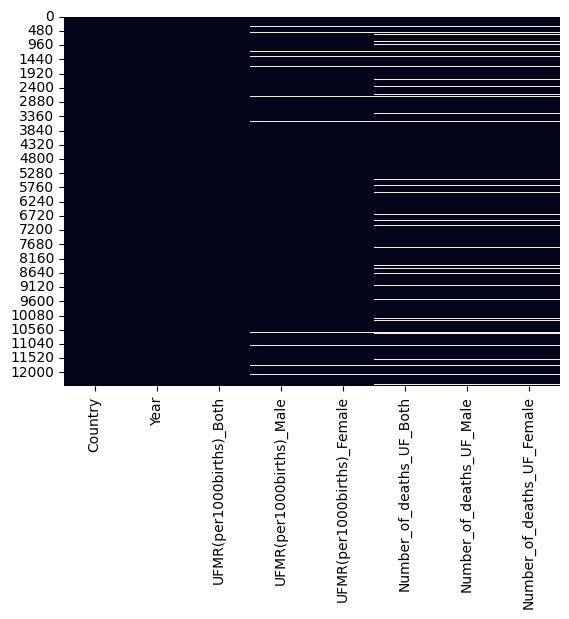

In [ ]:
import seaborn as sns
# Check missing data
sns.heatmap(df_ufmr.isnull(), cbar=False)

# Findings: Given this map, it is seen that missing values randomly happened.

In [ ]:
# Save the file as csv
df_ufmr.to_csv("cleaned_df_ufmr_v1.0.csv", index=False)

## // End of the section: Preprocessing for mortality datasets.

## // Start of the section: Preprocessing for breastfeeding datasets

In [ ]:
df_nutrition = pd.read_csv(infant_nutrition_file)

In [ ]:
df_nutrition.shape

(735, 4)

In [ ]:
df_nutrition.head()

,"Countries, territories and areas",Year,Early initiation of breastfeeding (%),Infants exclusively breastfed for the first six months of life (%)
0,Afghanistan,2018,NaN,57.5
1,Afghanistan,2015-2016,40.9,NaN
2,Afghanistan,2015,NaN,43.1 [40.1-46.2]
3,Albania,2017,NaN,36.5 [29.8-43.9]
4,Albania,2009,NaN,37.1 [27.1-48.5]


In [ ]:
# To simplify and organise the each column's name (Africa dataset)
df_nutrition = df_nutrition.rename({'Countries, territories and areas': 'Country'}, axis='columns')
df_nutrition.head()

,Country,Year,Early initiation of breastfeeding (%),Infants exclusively breastfed for the first six months of life (%)
0,Afghanistan,2018,NaN,57.5
1,Afghanistan,2015-2016,40.9,NaN
2,Afghanistan,2015,NaN,43.1 [40.1-46.2]
3,Albania,2017,NaN,36.5 [29.8-43.9]
4,Albania,2009,NaN,37.1 [27.1-48.5]


In [ ]:
# Check information of df_nutrition
df_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 4 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Country                                                             735 non-null    object 
 1   Year                                                                735 non-null    object 
 2   Early initiation of breastfeeding (%)                               400 non-null    float64
 3   Infants exclusively breastfed for the first six months of life (%)  604 non-null    object 
dtypes: float64(1), object(3)
memory usage: 23.1+ KB


In [ ]:
# Extract numerical data from objective type's data
column_to_clean = 'Infants exclusively breastfed for the first six months of life (%)'

def extract_main_value(value):
    if isinstance(value, str):
        # ignore [data]
        main_value = re.search(r"[-+]?\d*\.\d+|\d+", value)  # extract the first data (float type)
        if main_value:
            return float(main_value.group())  # return as float
    return None

df_nutrition[column_to_clean] = df_nutrition[column_to_clean].apply(extract_main_value)
df_nutrition.head()

,Country,Year,Early initiation of breastfeeding (%),Infants exclusively breastfed for the first six months of life (%)
0,Afghanistan,2018,NaN,57.5
1,Afghanistan,2015-2016,40.9,NaN
2,Afghanistan,2015,NaN,43.1
3,Albania,2017,NaN,36.5
4,Albania,2009,NaN,37.1


In [ ]:
# Check information of df_nutrition
df_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 4 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Country                                                             735 non-null    object 
 1   Year                                                                735 non-null    object 
 2   Early initiation of breastfeeding (%)                               400 non-null    float64
 3   Infants exclusively breastfed for the first six months of life (%)  604 non-null    float64
dtypes: float64(2), object(2)
memory usage: 23.1+ KB


In [ ]:
# Number of rows having the year range
df_nutrition_range_years = df_nutrition[df_nutrition['Year'].str.contains('-')]
print(f"Number of rows having the year range: {len(df_nutrition_range_years)}")

Number of rows having the year range: 115


### Using a Hill Climbing Algorithm


In [ ]:
import time  # Import the time module to measure execution time

# Start the timer before the process begins
start_time = time.time()

# Variables to track results
total_iterations = 0  # Total iterations for all countries
non_zero_cost_countries = []  # List to store countries that didn't reach a cost of 0

for index, row in df_nutrition_range_years.iterrows():
    country = row['Country']
    year_range = row['Year']
    year_start, year_end = map(int, year_range.split('-'))  # Example: "2016-2017" → 2016, 2017

    # Target dataframe for the search (list of all years for the same country)
    other_years = [int(year) for year in df_nutrition[df_nutrition['Country'] == country]['Year'] if '-' not in str(year)]

    # Hill　Climbing Algorithm begins for Year Start
    s = year_start
    start_iterations = 0  # Track iterations for Year Start
    while True:
        # Generate neighbor solutions and calculate the cost as absolute values
        neighbourhood = {year: abs(s - year) for year in other_years}

        # Select the year with the smallest cost
        s_prime, min_cost = min(neighbourhood.items(), key=lambda x: x[1])

        start_iterations += 1  # Increment the iteration counter

        # If the cost becomes 0, exit
        if min_cost == 0:
            s = s_prime
            break

        # If a better solution is found, update it (hill climbing step)
        s = s_prime

    # Save the optimal solution for Year Start
    start_solution = s

    # Check if the Start Year achieved a cost of 0
    if min_cost == 0:
        # If the cost is 0, do not perform the search for Year End
        end_iterations = 0
        print(f"Start Year for {country} reached 0 cost, skipping End Year search.")
    else:
        # Hill　Climbing Algorithm begins for Year End if Start Year didn't achieve 0 cost
        s = year_end
        end_iterations = 0  # Track iterations for Year End
        while True:
            # Generate neighbor solutions and calculate the cost as absolute values
            neighbourhood = {year: abs(s - year) for year in other_years}
            s_prime, min_cost = min(neighbourhood.items(), key=lambda x: x[1])

            end_iterations += 1  # Increment the iteration counter

            if min_cost == 0:
                s = s_prime
                break

            # If a better solution is found, update it (hill-climbing step)
            s = s_prime

        # Save the optimal solution for Year End
        end_solution = s

    # Select the optimal solution: choose the one with the smaller cost
    selected_year = start_solution if start_solution in other_years else end_solution

    # Update the selected year (convert the range year to a single year)
    df_nutrition.at[index, 'Year'] = selected_year

    # Total iterations for this country
    iterations_for_country = start_iterations + end_iterations
    total_iterations += iterations_for_country  # Update the global counter

    # If the cost was not reduced to 0, log the country
    if min(neighbourhood.values()) > 0:
        non_zero_cost_countries.append(country)

    print(f"Search for range {year_range} in {country} → Selected: {df_nutrition.at[index, 'Year']}")
    print(f"Iterations needed for {country}: {iterations_for_country} (Start: {start_iterations}, End: {end_iterations})")

# End the timer after the process ends
end_time = time.time()

# Calculate the total execution time
execution_time = end_time - start_time

# Output the results
print(f"Total iterations across all countries: {total_iterations}")
print(f"Countries that did not achieve a cost of 0: {len(non_zero_cost_countries)}")
print(f"List of countries with non-zero costs: {non_zero_cost_countries}")
print(f"Total time taken for the process: {execution_time} seconds")


Start Year for Afghanistan reached 0 cost, skipping End Year search.
Search for range  2015-2016 in Afghanistan → Selected: 2015
Iterations needed for Afghanistan: 1 (Start: 1, End: 0)
Start Year for Albania reached 0 cost, skipping End Year search.
Search for range  2008-2009 in Albania → Selected: 2009
Iterations needed for Albania: 2 (Start: 2, End: 0)
Start Year for Algeria reached 0 cost, skipping End Year search.
Search for range  2012-2013 in Algeria → Selected: 2012
Iterations needed for Algeria: 1 (Start: 1, End: 0)
Start Year for Angola reached 0 cost, skipping End Year search.
Search for range  2015-2016 in Angola → Selected: 2015
Iterations needed for Angola: 1 (Start: 1, End: 0)
Start Year for Argentina reached 0 cost, skipping End Year search.
Search for range  2011-2012 in Argentina → Selected: 2011
Iterations needed for Argentina: 1 (Start: 1, End: 0)
Start Year for Armenia reached 0 cost, skipping End Year search.
Search for range  2015-2016 in Armenia → Selected: 2016


### // Summary of Results from the Hill Climbing Algorithm:
*   Countries that did not achieve a cost of 0: 0
*   Total time taken for the process: 0.24 seconds

The algorithm successfully found a zero-cost solution for all countries with year-range data. Furthermore, the computation time was remarkably fast, making the Hill Climbing Algorithm a simple yet efficient method for aligning year-range data.



In [ ]:
df_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 4 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Country                                                             735 non-null    object 
 1   Year                                                                735 non-null    object 
 2   Early initiation of breastfeeding (%)                               400 non-null    float64
 3   Infants exclusively breastfed for the first six months of life (%)  604 non-null    float64
dtypes: float64(2), object(2)
memory usage: 23.1+ KB


In [ ]:
# Change Year as int type
df_nutrition['Year'] = df_nutrition['Year'].astype(int)

In [ ]:
def merge_rows(group):
    # Process to combine rows within the group
    merged = pd.Series(index=group.columns)
    # Take the first non-missing value
    merged['Country'] = group['Country'].iloc[0]
    merged['Year'] = group['Year'].iloc[0]

    # For each column, select the first non-missing value
    merged['Early initiation of breastfeeding (%)'] = group['Early initiation of breastfeeding (%)'].dropna().iloc[0] if group['Early initiation of breastfeeding (%)'].notna().any() else None
    merged['Infants exclusively breastfed for the first six months of life (%)'] = group['Infants exclusively breastfed for the first six months of life (%)'].dropna().iloc[0] if group['Infants exclusively breastfed for the first six months of life (%)'].notna().any() else None

    return merged

# 1. Group the data by 'Country' and 'Year', and generate the merged dataset
df_nutrition = df_nutrition.groupby(['Country', 'Year']).apply(merge_rows).reset_index(drop=True)

# Display the result
display(df_nutrition)

<ipython-input-49-94103ee8e4cd>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Afghanistan' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merged['Country'] = group['Country'].iloc[0]
<ipython-input-49-94103ee8e4cd>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Afghanistan' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merged['Country'] = group['Country'].iloc[0]
<ipython-input-49-94103ee8e4cd>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Albania' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merged['Country'] = group['Country'].iloc[0]
<ipython-input-49-94103ee8e4cd>:5: FutureWarning: Setting an item

,Country,Year,Early initiation of breastfeeding (%),Infants exclusively breastfed for the first six months of life (%)
0,Afghanistan,2015,40.9,43.1
1,Afghanistan,2018,NaN,57.5
2,Albania,2000,NaN,6.3
3,Albania,2005,29.9,3.4
4,Albania,2009,43.4,37.1
...,...,...,...,...
615,Zimbabwe,2019,NaN,41.9
616,"occupied Palestinian territory, including east...",2006,NaN,24.8
617,"occupied Palestinian territory, including east...",2010,NaN,28.7
618,"occupied Palestinian territory, including east...",2014,NaN,38.1


In [ ]:
# Save the file as csv
df_nutrition.to_csv("cleaned_df_nutrition_v1.0.csv", index=False)

## // End of the section: Preprocessing for breastfeeding datasets

## // Start of the section: Merge the two datasets

In [9]:
# Load the CSV files
df_ufmr = pd.read_csv('cleaned_df_ufmr_v1.0.csv')
df_nutrition = pd.read_csv('cleaned_df_nutrition_v1.0.csv')

# Perform the merge
df_merged = pd.merge(df_ufmr, df_nutrition, on=['Country', 'Year'], how='left')

# Display the result
display(df_merged)

,Country,Year,UFMR(per1000births)_Both,UFMR(per1000births)_Male,UFMR(per1000births)_Female,Number_of_deaths_UF_Both,Number_of_deaths_UF_Male,Number_of_deaths_UF_Female,Early initiation of breastfeeding (%),Infants exclusively breastfed for the first six months of life (%)
0,Algeria,2021,22.34,23.98,20.60,21567.0,11834.0,9733.0,NaN,NaN
1,Algeria,2020,22.90,24.58,21.14,22565.0,12373.0,10192.0,NaN,NaN
2,Algeria,2019,23.45,25.13,21.68,23456.0,12847.0,10609.0,NaN,28.6
3,Algeria,2018,23.98,25.67,22.20,24191.0,13234.0,10957.0,NaN,NaN
4,Algeria,2017,24.48,26.18,22.68,24709.0,13506.0,11203.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
12463,Viet Nam,1968,84.32,95.96,72.04,NaN,NaN,NaN,NaN,NaN
12464,Viet Nam,1967,85.00,96.90,72.50,NaN,NaN,NaN,NaN,NaN
12465,Viet Nam,1966,85.72,97.81,72.98,NaN,NaN,NaN,NaN,NaN
12466,Viet Nam,1965,86.32,98.59,73.56,NaN,NaN,NaN,NaN,NaN


<Axes: >

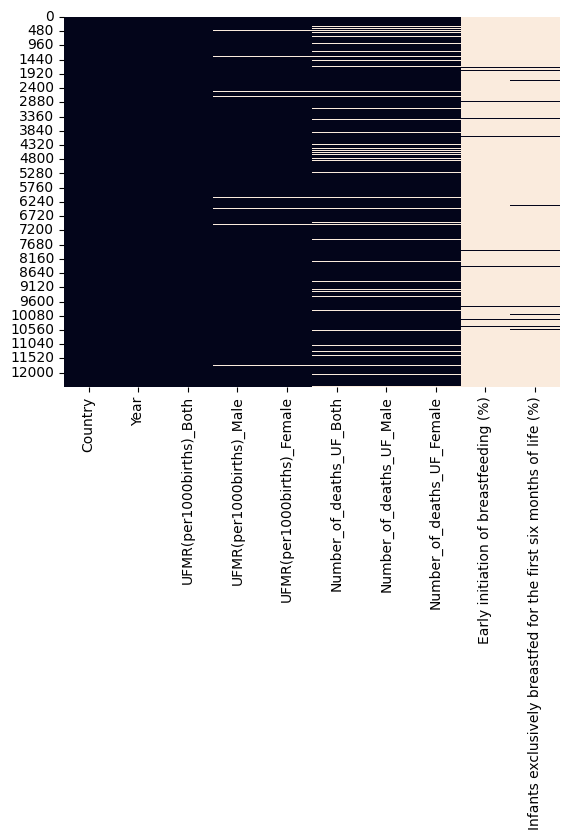

In [11]:
# Check missing data
import seaborn as sns
sns.heatmap(df_merged.isnull(), cbar=False)

# Findings: Given this map, missing values randomly happened.

In [12]:
# Save the file as csv
df_merged.to_csv("merged_dataset_v1.0.csv", index=False)

## // End of the section: Merge the two datasets

## // Start of the section: Tackle the missing values

In [94]:
df = pd.read_csv('merged_dataset_v1.0.csv')

In [95]:
df.head()

,Country,Year,UFMR(per1000births)_Both,UFMR(per1000births)_Male,UFMR(per1000births)_Female,Number_of_deaths_UF_Both,Number_of_deaths_UF_Male,Number_of_deaths_UF_Female,Early initiation of breastfeeding (%),Infants exclusively breastfed for the first six months of life (%)
0,Algeria,2021,22.34,23.98,20.60,21567.0,11834.0,9733.0,NaN,NaN
1,Algeria,2020,22.90,24.58,21.14,22565.0,12373.0,10192.0,NaN,NaN
2,Algeria,2019,23.45,25.13,21.68,23456.0,12847.0,10609.0,NaN,28.6
3,Algeria,2018,23.98,25.67,22.20,24191.0,13234.0,10957.0,NaN,NaN
4,Algeria,2017,24.48,26.18,22.68,24709.0,13506.0,11203.0,NaN,NaN


In [96]:
pd.unique(df["Country"])

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', "Cote d'Ivoire", 'Cabo Verde', 'Cameroon',
       'Central African Republic', 'Chad', 'Comoros', 'Congo',
       'Democratic Republic of the Congo', 'Equatorial Guinea', 'Eritrea',
       'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar',
       'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Mozambique',
       'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe',
       'Senegal', 'Seychelles', 'Sierra Leone', 'South Africa',
       'South Sudan', 'Togo', 'Uganda', 'United Republic of Tanzania',
       'Zambia', 'Zimbabwe', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Bahamas', 'Barbados', 'Belize',
       'Bolivia (Plurinational State of)', 'Brazil',
       'British Virgin Islands', 'Canada', 'Chile', 'Colombia',
       'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'Ecuador',
       'El Salva

In [97]:
# Add region mapping based on the provided countries
region_mapping = {
    # Africa
    'Algeria': 'Africa', 'Angola': 'Africa', 'Benin': 'Africa', 'Botswana': 'Africa', 'Burkina Faso': 'Africa',
    'Burundi': 'Africa', "Cote d'Ivoire": 'Africa', 'Cabo Verde': 'Africa', 'Cameroon': 'Africa',
    'Central African Republic': 'Africa', 'Chad': 'Africa', 'Comoros': 'Africa', 'Congo': 'Africa',
    'Democratic Republic of the Congo': 'Africa', 'Equatorial Guinea': 'Africa', 'Eritrea': 'Africa',
    'Eswatini': 'Africa', 'Ethiopia': 'Africa', 'Gabon': 'Africa', 'Gambia': 'Africa', 'Ghana': 'Africa',
    'Guinea': 'Africa', 'Guinea-Bissau': 'Africa', 'Kenya': 'Africa', 'Lesotho': 'Africa', 'Liberia': 'Africa',
    'Madagascar': 'Africa', 'Malawi': 'Africa', 'Mali': 'Africa', 'Mauritania': 'Africa', 'Mauritius': 'Africa',
    'Mozambique': 'Africa', 'Namibia': 'Africa', 'Niger': 'Africa', 'Nigeria': 'Africa', 'Rwanda': 'Africa',
    'Sao Tome and Principe': 'Africa', 'Senegal': 'Africa', 'Seychelles': 'Africa', 'Sierra Leone': 'Africa',
    'South Africa': 'Africa', 'South Sudan': 'Africa', 'Togo': 'Africa', 'Uganda': 'Africa',
    'United Republic of Tanzania': 'Africa', 'Zambia': 'Africa', 'Zimbabwe': 'Africa',

    'Anguilla': 'The Americas', 'Antigua and Barbuda': 'The Americas', 'Argentina': 'The Americas',
    'Bahamas': 'The Americas', 'Barbados': 'The Americas', 'Belize': 'The Americas',
    'Bolivia (Plurinational State of)': 'The Americas', 'Brazil': 'The Americas',
    'British Virgin Islands': 'The Americas', 'Canada': 'The Americas', 'Chile': 'The Americas',
    'Colombia': 'The Americas', 'Costa Rica': 'The Americas', 'Cuba': 'The Americas', 'Dominica': 'The Americas',
    'Dominican Republic': 'The Americas', 'Ecuador': 'The Americas', 'El Salvador': 'The Americas',
    'Grenada': 'The Americas', 'Guatemala': 'The Americas', 'Guyana': 'The Americas', 'Haiti': 'The Americas',
    'Honduras': 'The Americas', 'Jamaica': 'The Americas', 'Mexico': 'The Americas', 'Montserrat': 'The Americas',
    'Nicaragua': 'The Americas', 'Panama': 'The Americas', 'Paraguay': 'The Americas', 'Peru': 'The Americas',
    'Saint Kitts and Nevis': 'The Americas', 'Saint Lucia': 'The Americas',
    'Saint Vincent and the Grenadines': 'The Americas', 'Suriname': 'The Americas',
    'Trinidad and Tobago': 'The Americas', 'Turks and Caicos Islands': 'The Americas',
    'United States of America': 'The Americas', 'Uruguay': 'The Americas',
    'Venezuela (Bolivarian Republic of)': 'The Americas',

    # Middle East and North Africa (MENA)
    'Afghanistan': 'MENA', 'Bahrain': 'MENA', 'Djibouti': 'MENA', 'Egypt': 'MENA',
    'Iran (Islamic Republic of)': 'MENA', 'Iraq': 'MENA', 'Jordan': 'MENA', 'Kuwait': 'MENA',
    'Lebanon': 'MENA', 'Libya': 'MENA', 'Morocco': 'MENA',
    'occupied Palestinian territory, including east Jerusalem': 'MENA', 'Oman': 'MENA', 'Pakistan': 'MENA',
    'Qatar': 'MENA', 'Saudi Arabia': 'MENA', 'Somalia': 'MENA', 'Sudan': 'MENA', 'Syrian Arab Republic': 'MENA',
    'Tunisia': 'MENA', 'United Arab Emirates': 'MENA', 'Yemen': 'MENA',

    # Europe and Central Asia
    'Albania': 'Europe and Central Asia', 'Andorra': 'Europe and Central Asia', 'Armenia': 'Europe and Central Asia',
    'Austria': 'Europe and Central Asia', 'Azerbaijan': 'Europe and Central Asia',
    'Belarus': 'Europe and Central Asia', 'Belgium': 'Europe and Central Asia',
    'Bosnia and Herzegovina': 'Europe and Central Asia', 'Bulgaria': 'Europe and Central Asia',
    'Croatia': 'Europe and Central Asia', 'Cyprus': 'Europe and Central Asia', 'Czechia': 'Europe and Central Asia',
    'Denmark': 'Europe and Central Asia', 'Estonia': 'Europe and Central Asia', 'Finland': 'Europe and Central Asia',
    'France': 'Europe and Central Asia', 'Georgia': 'Europe and Central Asia', 'Germany': 'Europe and Central Asia',
    'Greece': 'Europe and Central Asia', 'Hungary': 'Europe and Central Asia', 'Iceland': 'Europe and Central Asia',
    'Ireland': 'Europe and Central Asia', 'Israel': 'Europe and Central Asia', 'Italy': 'Europe and Central Asia',
    'Kazakhstan': 'Europe and Central Asia', 'Kyrgyzstan': 'Europe and Central Asia', 'Latvia': 'Europe and Central Asia',
    'Lithuania': 'Europe and Central Asia', 'Luxembourg': 'Europe and Central Asia',
    'Malta': 'Europe and Central Asia', 'Monaco': 'Europe and Central Asia', 'Montenegro': 'Europe and Central Asia',
    'Netherlands (Kingdom of the)': 'Europe and Central Asia', 'North Macedonia': 'Europe and Central Asia',
    'Norway': 'Europe and Central Asia', 'Poland': 'Europe and Central Asia', 'Portugal': 'Europe and Central Asia',
    'Republic of Moldova': 'Europe and Central Asia', 'Romania': 'Europe and Central Asia',
    'Russian Federation': 'Europe and Central Asia', 'San Marino': 'Europe and Central Asia',
    'Serbia': 'Europe and Central Asia', 'Slovakia': 'Europe and Central Asia', 'Slovenia': 'Europe and Central Asia',
    'Spain': 'Europe and Central Asia', 'Sweden': 'Europe and Central Asia',
    'Switzerland': 'Europe and Central Asia', 'Turkiye': 'Europe and Central Asia',
    'Ukraine': 'Europe and Central Asia', 'United Kingdom of Great Britain and Northern Ireland': 'Europe and Central Asia',
    'Uzbekistan': 'Europe and Central Asia','Turkmenistan':'Europe and Central Asia', 'Tajikistan': 'Europe and Central Asia',

    # South Asia
    'Bangladesh': 'South Asia', 'Bhutan': 'South Asia', "Democratic People's Republic of Korea": 'South Asia',
    'India': 'South Asia', 'Indonesia': 'South Asia', 'Maldives': 'South Asia', 'Myanmar': 'South Asia',
    'Nepal': 'South Asia', 'Sri Lanka': 'South Asia', 'Thailand': 'South Asia', 'Timor-Leste': 'South Asia',

    # East Asia and Pacific
    'Australia': 'East Asia and Pacific', 'Brunei Darussalam': 'East Asia and Pacific',
    'Cambodia': 'East Asia and Pacific', 'China': 'East Asia and Pacific', 'Cook Islands': 'East Asia and Pacific',
    'Fiji': 'East Asia and Pacific', 'Japan': 'East Asia and Pacific', 'Kiribati': 'East Asia and Pacific',
    "Lao People's Democratic Republic": 'East Asia and Pacific', 'Malaysia': 'East Asia and Pacific',
    'Marshall Islands': 'East Asia and Pacific', 'Micronesia (Federated States of)': 'East Asia and Pacific',
    'Mongolia': 'East Asia and Pacific', 'Nauru': 'East Asia and Pacific', 'New Zealand': 'East Asia and Pacific',
    'Niue': 'East Asia and Pacific', 'Palau': 'East Asia and Pacific', 'Papua New Guinea': 'East Asia and Pacific',
    'Philippines': 'East Asia and Pacific', 'Republic of Korea': 'East Asia and Pacific', 'Samoa': 'East Asia and Pacific',
    'Singapore': 'East Asia and Pacific', 'Solomon Islands': 'East Asia and Pacific', 'Tonga': 'East Asia and Pacific',
    'Tuvalu': 'East Asia and Pacific', 'Vanuatu': 'East Asia and Pacific', 'Viet Nam': 'East Asia and Pacific'
}

# Map the regions to the dataframe based on the 'Country' column
df['Region'] = df['Country'].map(region_mapping)

# Display the updated dataframe
df.head()

,Country,Year,UFMR(per1000births)_Both,UFMR(per1000births)_Male,UFMR(per1000births)_Female,Number_of_deaths_UF_Both,Number_of_deaths_UF_Male,Number_of_deaths_UF_Female,Early initiation of breastfeeding (%),Infants exclusively breastfed for the first six months of life (%),Region
0,Algeria,2021,22.34,23.98,20.60,21567.0,11834.0,9733.0,NaN,NaN,Africa
1,Algeria,2020,22.90,24.58,21.14,22565.0,12373.0,10192.0,NaN,NaN,Africa
2,Algeria,2019,23.45,25.13,21.68,23456.0,12847.0,10609.0,NaN,28.6,Africa
3,Algeria,2018,23.98,25.67,22.20,24191.0,13234.0,10957.0,NaN,NaN,Africa
4,Algeria,2017,24.48,26.18,22.68,24709.0,13506.0,11203.0,NaN,NaN,Africa


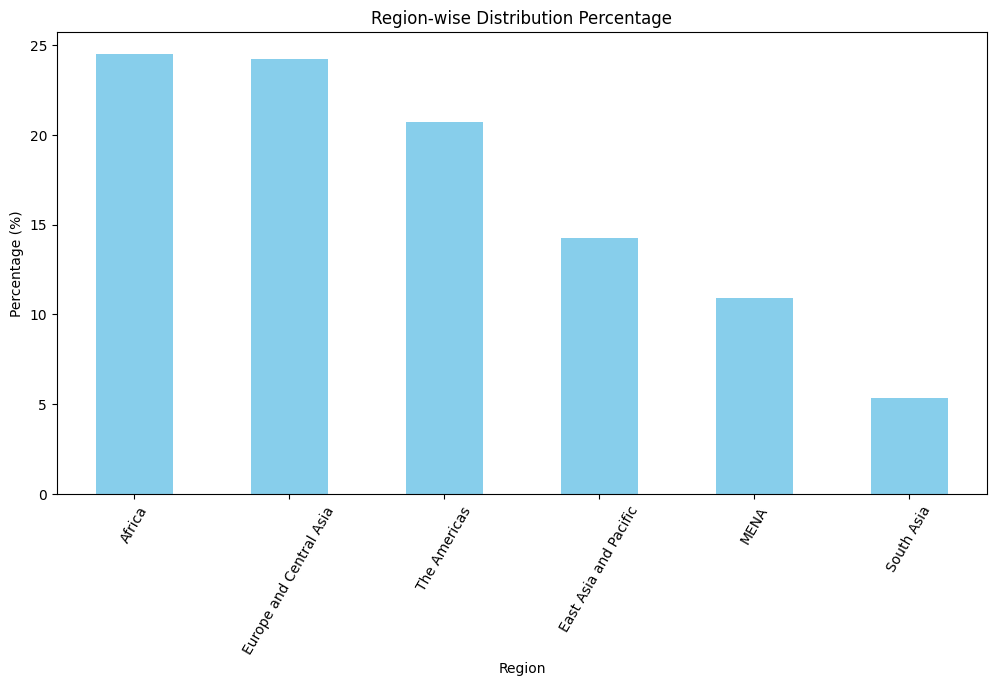

,proportion
Region,
Africa,24.494706
Europe and Central Asia,24.197947
The Americas,20.741097
East Asia and Pacific,14.252486
MENA,10.940006
South Asia,5.373757


In [98]:
import matplotlib.pyplot as plt

# Region　Rates
region_counts = df['Region'].value_counts(normalize=True) * 100

region_counts.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title("Region-wise Distribution Percentage")
plt.ylabel("Percentage (%)")
plt.xlabel("Region")
plt.xticks(rotation=60)
plt.show()

region_counts

In [99]:
pd.unique(df["Year"])

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000,
       1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989,
       1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978,
       1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967,
       1966, 1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956,
       1955, 1954, 1953, 1952, 1951, 1950, 1949, 1948, 1947, 1946, 1945,
       1944, 1943, 1942, 1941, 1940, 1939, 1938, 1937, 1936, 1935, 1934,
       1933, 1932])

In [100]:
# Sample data (assuming your DataFrame is already stored in the variable df)
# Display unique year values in the 'Year' column for reference
unique_years = df['Year'].unique()

# Step 1: Define the bin edges, avoiding duplicate 1990
bins_final = [0] + list(range(1990, 2025, 4))  # One bin for years before 1989, and four-year bins from 1990 to 2021

# Step 2: Create labels corresponding to each bin
labels_final = ['<1989'] + [f'{year}-{year+3}' for year in range(1990, 2021, 4)]

# Step 3: Apply binning based on the 'Year' column and create the 'YearGroup_Final' column
df['YearGroup_Final'] = pd.cut(df['Year'], bins=bins_final, labels=labels_final, right=False, include_lowest=True)

# Step 4: Verify the results by checking the unique combinations of 'Year' and 'YearGroup_Final'
print(df[['Year', 'YearGroup_Final']].drop_duplicates())

      Year YearGroup_Final
0     2021       2018-2021
1     2020       2018-2021
2     2019       2018-2021
3     2018       2018-2021
4     2017       2014-2017
...    ...             ...
1346  1936           <1989
1347  1935           <1989
1348  1934           <1989
1349  1933           <1989
1350  1932           <1989

[90 rows x 2 columns]


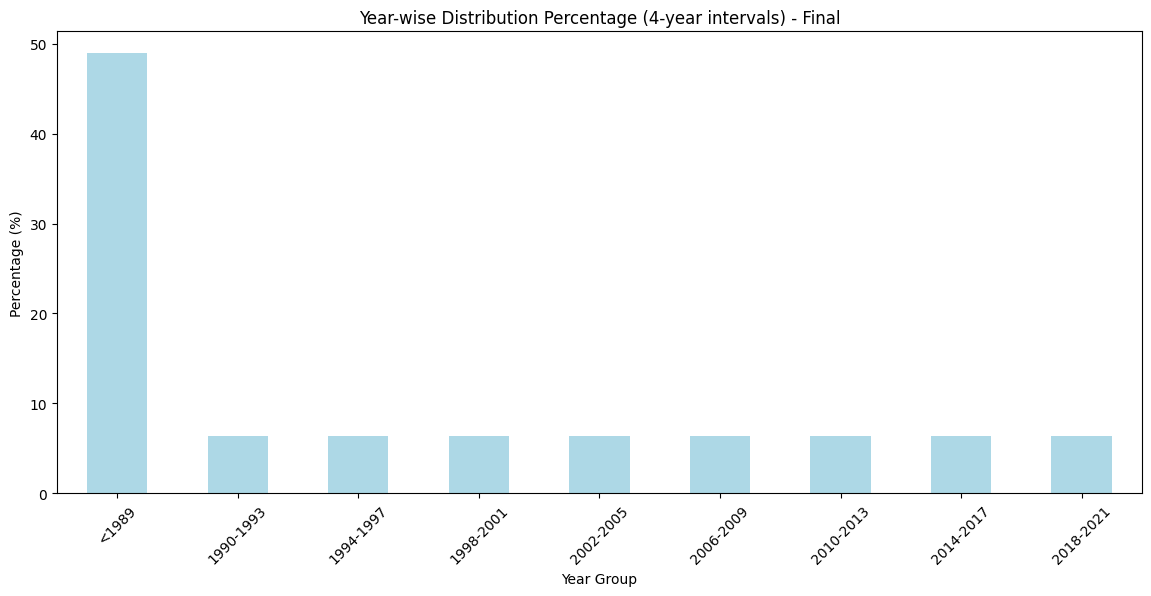

,proportion
YearGroup_Final,
<1989,48.925249
1990-1993,6.384344
1994-1997,6.384344
1998-2001,6.384344
2002-2005,6.384344
2006-2009,6.384344
2010-2013,6.384344
2014-2017,6.384344
2018-2021,6.384344


In [101]:
# Calculate the percentage distribution of each year group
year_group_counts_final = df['YearGroup_Final'].value_counts(normalize=True) * 100

# Plotting the distribution
year_group_counts_final.sort_index().plot(kind='bar', figsize=(14, 6), color='lightblue')
plt.title("Year-wise Distribution Percentage (4-year intervals) - Final")
plt.ylabel("Percentage (%)")
plt.xlabel("Year Group")
plt.xticks(rotation=45)
plt.show()

# Display the sorted year group counts
year_group_counts_final.sort_index()

In [102]:
# Step 1: Create a pivot table that calculates the median for each Region and YearGroup_Final
pivot_table_median = df.pivot_table(
    index='Region',
    columns='YearGroup_Final',
    values='Early initiation of breastfeeding (%)',
    aggfunc='median'
)

# Step 2: Define a function to fill missing values based on the Region and YearGroup_Final
def fill_missing_breastfeeding(row):
    if pd.isna(row['Early initiation of breastfeeding (%)']):
        # Check if row['YearGroup_Final'] and row['Region'] are NaN before accessing pivot table
        if pd.isna(row['YearGroup_Final']) or pd.isna(row['Region']):
            # Handle NaN values in 'YearGroup_Final' or 'Region'
            # Example: Fill with a default value or a calculated value (e.g., overall median)
            return df['Early initiation of breastfeeding (%)'].median() # Fill with the overall median
        else:
            year_group = row['YearGroup_Final']
            # Check if year_group exists as a column in pivot_table_median
            if year_group in pivot_table_median.columns and row['Region'] in pivot_table_median.index:
                # Retrieve the median value for the corresponding Region and YearGroup_Final
                return pivot_table_median.loc[row['Region'], year_group]
            else:
                # Handle the case where year_group or Region is not found in the pivot table
                # Fill with a default value or a calculated value
                return df['Early initiation of breastfeeding (%)'].median() # Fill with the overall median
    else:
        return row['Early initiation of breastfeeding (%)']

# Step 3: Apply the function to fill missing values
df['Early initiation of breastfeeding (%)'] = df.apply(fill_missing_breastfeeding, axis=1)

# Check if the missing values are filled
print(df['Early initiation of breastfeeding (%)'].isna().sum())  # This should return 0 if all NaNs are filled

<ipython-input-102-cb265aa0de0f>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table_median = df.pivot_table(


880


In [103]:
# Step 1: Create a pivot table that calculates the median for each Region and YearGroup_Final
pivot_table_median_exclusive = df.pivot_table(
    index='Region',
    columns='YearGroup_Final',
    values='Infants exclusively breastfed for the first six months of life (%)',
    aggfunc='median'
)

# Step 2: Define a function to fill missing values based on the Region and YearGroup_Final
def fill_missing_exclusive_breastfeeding(row):
    if pd.isna(row['Infants exclusively breastfed for the first six months of life (%)']):
        # Check if row['YearGroup_Final'] and row['Region'] are NaN before accessing pivot table
        if pd.isna(row['YearGroup_Final']) or pd.isna(row['Region']):
            # Handle NaN values in 'YearGroup_Final' or 'Region'
            # Example: Fill with a default value or a calculated value (e.g., overall median)
            return df['Infants exclusively breastfed for the first six months of life (%)'].median()  # Fill with overall median
        else:
            year_group = row['YearGroup_Final']
            # Check if year_group exists as a column in pivot_table_median_exclusive
            if year_group in pivot_table_median_exclusive.columns and row['Region'] in pivot_table_median_exclusive.index:
                # Retrieve the median value for the corresponding Region and YearGroup_Final
                return pivot_table_median_exclusive.loc[row['Region'], year_group]
            else:
                # Handle the case where year_group or Region is not found in the pivot table
                # Fill with a default value or a calculated value
                return df['Infants exclusively breastfed for the first six months of life (%)'].median()  # Fill with the overall median
    else:
        return row['Infants exclusively breastfed for the first six months of life (%)']

# Step 3: Apply the function to fill missing values
df['Infants exclusively breastfed for the first six months of life (%)'] = df.apply(fill_missing_exclusive_breastfeeding, axis=1)

# Check if the missing values are filled
print(df['Infants exclusively breastfed for the first six months of life (%)'].isna().sum())  # This should return 0 if all NaNs are filled


<ipython-input-103-005a4770c82b>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table_median_exclusive = df.pivot_table(


2234


<Axes: >

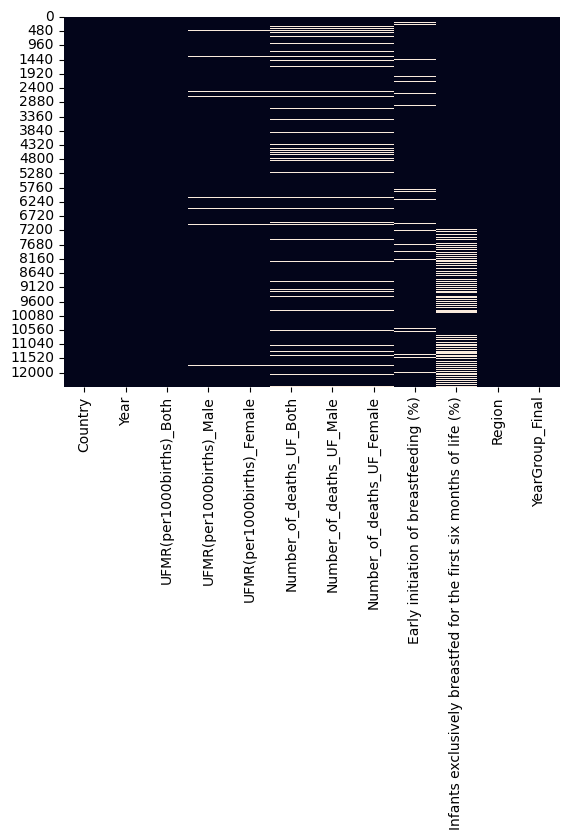

In [104]:
# Check missing data
sns.heatmap(df.isnull(), cbar=False)

# Findings: Given this map, missing values randomly happened.

In [105]:
# List of columns to keep
columns_to_keep = ['Country', 'Year', 'UFMR(per1000births)_Both','Early initiation of breastfeeding (%)','Infants exclusively breastfed for the first six months of life (%)','Region','YearGroup_Final']

# Drop all other columns
df_filtered = df[columns_to_keep]

# Display the resulting dataframe
df_filtered.head()

,Country,Year,UFMR(per1000births)_Both,Early initiation of breastfeeding (%),Infants exclusively breastfed for the first six months of life (%),Region,YearGroup_Final
0,Algeria,2021,22.34,NaN,50.6,Africa,2018-2021
1,Algeria,2020,22.90,NaN,50.6,Africa,2018-2021
2,Algeria,2019,23.45,NaN,28.6,Africa,2018-2021
3,Algeria,2018,23.98,NaN,50.6,Africa,2018-2021
4,Algeria,2017,24.48,50.8,42.9,Africa,2014-2017


In [106]:
df_filtered.shape

(12468, 7)

<Axes: >

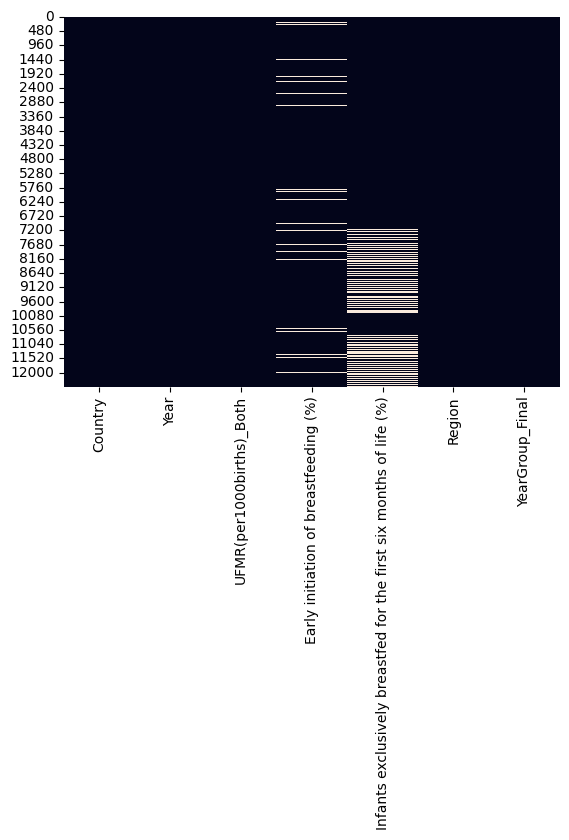

In [107]:
# Check missing data
sns.heatmap(df_filtered.isnull(), cbar=False)

Number of NaN values in 'Infants exclusively breastfed...': 2234

NaN counts by Region for Infants exclusively breastfed for the first six months of life:
Region
Africa                        0
East Asia and Pacific       913
Europe and Central Asia    1321
MENA                          0
South Asia                    0
The Americas                  0
Name: Infants exclusively breastfed for the first six months of life (%), dtype: int64

NaN counts by Year Group for Infants exclusively breastfed for the first six months of life:
YearGroup_Final
<1989        2234
1990-1993       0
1994-1997       0
1998-2001       0
2002-2005       0
2006-2009       0
2010-2013       0
2014-2017       0
2018-2021       0
Name: Infants exclusively breastfed for the first six months of life (%), dtype: int64


<ipython-input-113-59b8e6ab5e45>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nan_by_year_group_exclusive_breastfeeding = df_filtered.groupby('YearGroup_Final')['Infants exclusively breastfed for the first six months of life (%)'].apply(lambda x: x.isna().sum())


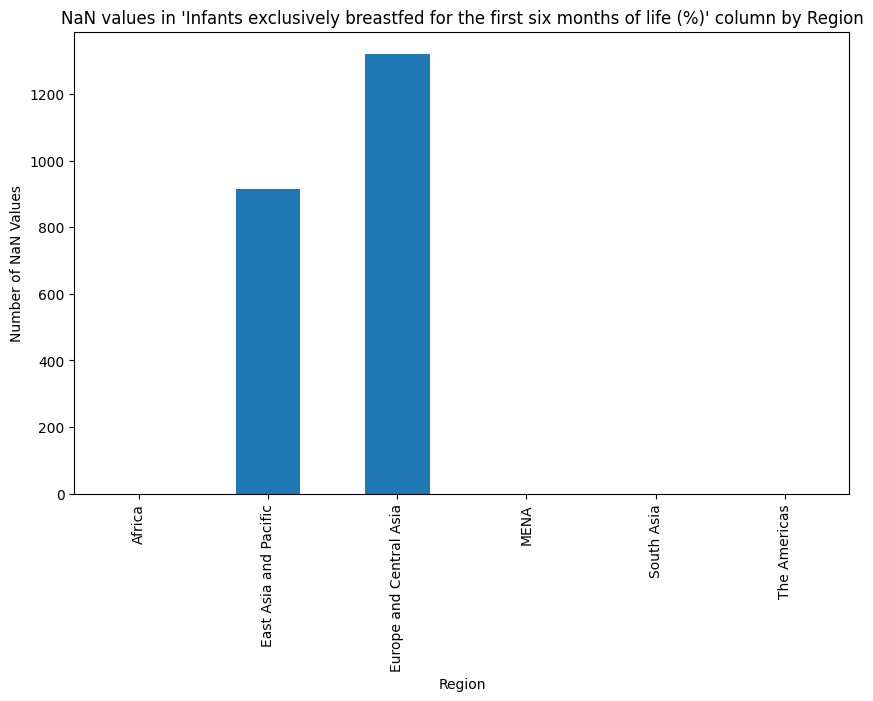

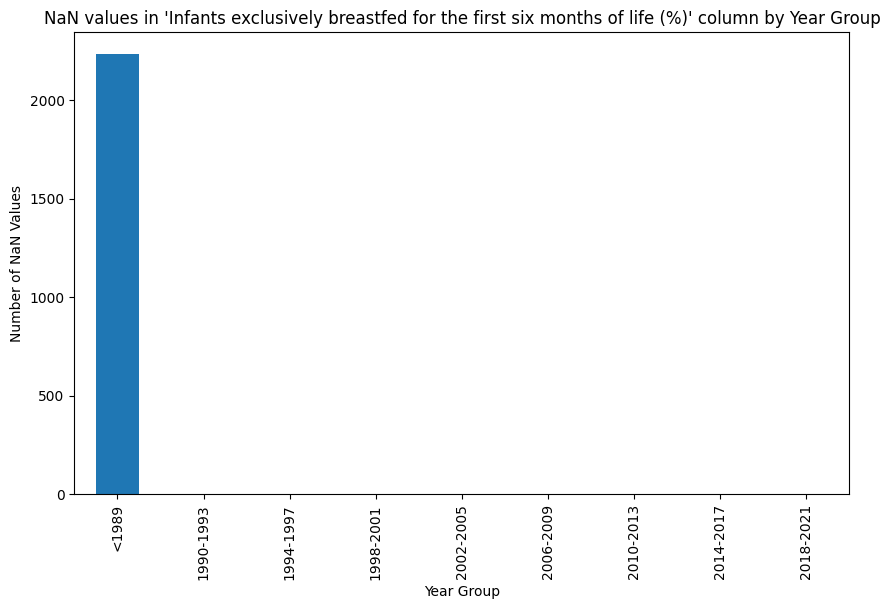


Countries with NaN values in Africa:


,Infants exclusively breastfed for the first six months of life (%)
Country,
Algeria,0
Angola,0
Benin,0
Botswana,0
Burkina Faso,0
Burundi,0
Cabo Verde,0
Cameroon,0
Central African Republic,0


In [113]:
# Analyse NaN values in 'Infants exclusively breastfed for the first six months of life (%)' column
exclusive_breastfeeding_nan_analysis = df_filtered['Infants exclusively breastfed for the first six months of life (%)'].isna().sum()
print(f"Number of NaN values in 'Infants exclusively breastfed...': {exclusive_breastfeeding_nan_analysis}")

# Analyse NaN values by region
nan_by_region_exclusive_breastfeeding = df_filtered.groupby('Region')['Infants exclusively breastfed for the first six months of life (%)'].apply(lambda x: x.isna().sum())
print("\nNaN counts by Region for Infants exclusively breastfed for the first six months of life:")
print(nan_by_region_exclusive_breastfeeding)

# Analyse NaN values by year group
nan_by_year_group_exclusive_breastfeeding = df_filtered.groupby('YearGroup_Final')['Infants exclusively breastfed for the first six months of life (%)'].apply(lambda x: x.isna().sum())
print("\nNaN counts by Year Group for Infants exclusively breastfed for the first six months of life:")
print(nan_by_year_group_exclusive_breastfeeding)

# Visualise NaN distribution by region
nan_by_region_exclusive_breastfeeding.plot(kind='bar', figsize=(10, 6))
plt.title("NaN values in 'Infants exclusively breastfed for the first six months of life (%)' column by Region")
plt.xlabel("Region")
plt.ylabel("Number of NaN Values")
plt.show()

# Visualise NaN distribution by year group
nan_by_year_group_exclusive_breastfeeding.plot(kind='bar', figsize=(10, 6))
plt.title("NaN values in 'Infants exclusively breastfed for the first six months of life (%)' column by Year Group")
plt.xlabel("Year Group")
plt.ylabel("Number of NaN Values")
plt.show()

# Further investigation: Look into specific countries or years with high NaN counts
# Example: Find countries with high NaN counts in a specific region
region_with_high_nans_exclusive_breastfeeding = 'Africa'  # Replace with the region of interest
countries_with_high_nans_exclusive_breastfeeding = df_filtered[df_filtered['Region'] == region_with_high_nans_exclusive_breastfeeding]
countries_nan_counts_exclusive_breastfeeding = countries_with_high_nans_exclusive_breastfeeding.groupby('Country')['Infants exclusively breastfed for the first six months of life (%)'].apply(lambda x: x.isna().sum())
print(f"\nCountries with NaN values in {region_with_high_nans_exclusive_breastfeeding}:")
countries_nan_counts_exclusive_breastfeeding

Number of NaN values in 'Early initiation of breastfeeding...': 880

NaN counts by Region for Early initiation of breastfeeding:
Region
Africa                     188
East Asia and Pacific      216
Europe and Central Asia    212
MENA                       176
South Asia                  88
The Americas                 0
Name: Early initiation of breastfeeding (%), dtype: int64

NaN counts by Year Group for Early initiation of breastfeeding:
YearGroup_Final
<1989          0
1990-1993    240
1994-1997      0
1998-2001      0
2002-2005      0
2006-2009      0
2010-2013      0
2014-2017      0
2018-2021    640
Name: Early initiation of breastfeeding (%), dtype: int64


<ipython-input-112-26e5dc53e59d>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nan_by_year_group_early_initiation = df_filtered.groupby('YearGroup_Final')['Early initiation of breastfeeding (%)'].apply(lambda x: x.isna().sum())


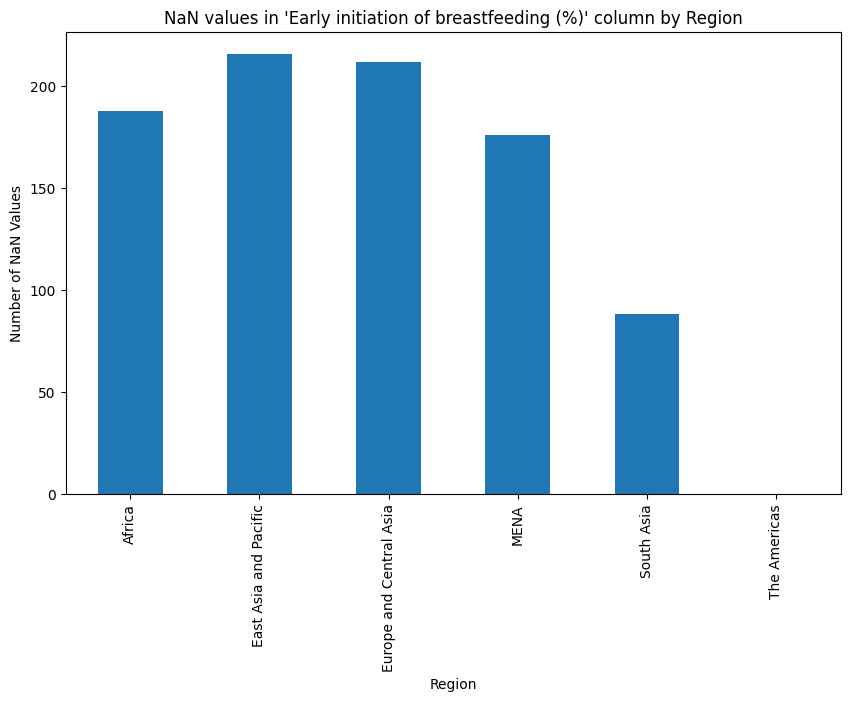

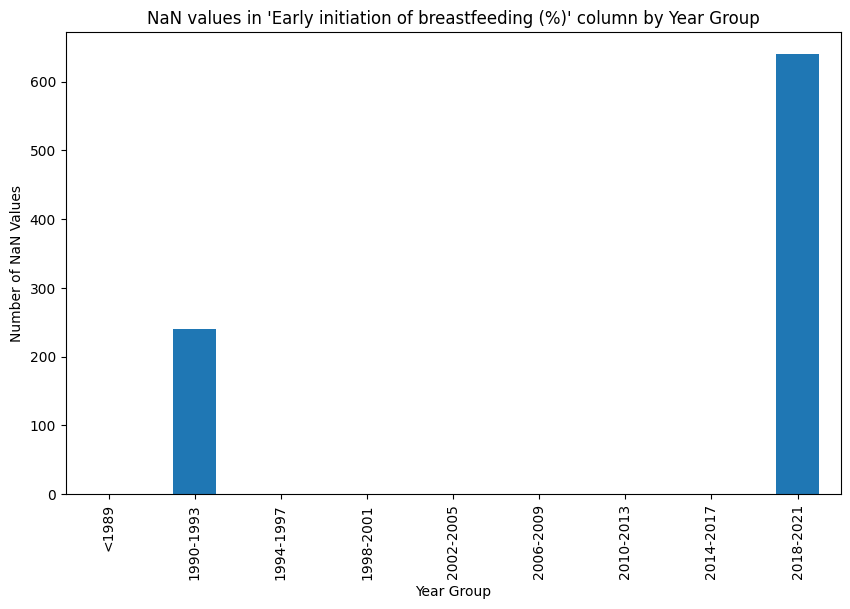


Countries with NaN values in Africa:


,Early initiation of breastfeeding (%)
Country,
Algeria,4
Angola,4
Benin,4
Botswana,4
Burkina Faso,4
Burundi,4
Cabo Verde,4
Cameroon,4
Central African Republic,4


In [112]:
# Analyse NaN values in 'Early initiation of breastfeeding (%)' column
early_initiation_nan_analysis = df_filtered['Early initiation of breastfeeding (%)'].isna().sum()
print(f"Number of NaN values in 'Early initiation of breastfeeding...': {early_initiation_nan_analysis}")

# Analyse NaN values by region
nan_by_region_early_initiation = df_filtered.groupby('Region')['Early initiation of breastfeeding (%)'].apply(lambda x: x.isna().sum())
print("\nNaN counts by Region for Early initiation of breastfeeding:")
print(nan_by_region_early_initiation)

# Analyse NaN values by year group
nan_by_year_group_early_initiation = df_filtered.groupby('YearGroup_Final')['Early initiation of breastfeeding (%)'].apply(lambda x: x.isna().sum())
print("\nNaN counts by Year Group for Early initiation of breastfeeding:")
print(nan_by_year_group_early_initiation)

# Visualise NaN distribution by region
nan_by_region_early_initiation.plot(kind='bar', figsize=(10, 6))
plt.title("NaN values in 'Early initiation of breastfeeding (%)' column by Region")
plt.xlabel("Region")
plt.ylabel("Number of NaN Values")
plt.show()

# Visualise NaN distribution by year group
nan_by_year_group_early_initiation.plot(kind='bar', figsize=(10, 6))
plt.title("NaN values in 'Early initiation of breastfeeding (%)' column by Year Group")
plt.xlabel("Year Group")
plt.ylabel("Number of NaN Values")
plt.show()

# Further investigation: Look into specific countries or years with high NaN counts
# Example: Find countries with high NaN counts in a specific region
region_with_high_nans_early_initiation = 'Africa'  # Replace with the region of interest
countries_with_high_nans_early_initiation = df_filtered[df_filtered['Region'] == region_with_high_nans_early_initiation]
countries_nan_counts_early_initiation = countries_with_high_nans_early_initiation.groupby('Country')['Early initiation of breastfeeding (%)'].apply(lambda x: x.isna().sum())
print(f"\nCountries with NaN values in {region_with_high_nans_early_initiation}:")
countries_nan_counts_early_initiation

In [114]:
correlation = df[['Early initiation of breastfeeding (%)', 'Infants exclusively breastfed for the first six months of life (%)']].corr()
print(correlation)

                                                    Early initiation of breastfeeding (%)  \
Early initiation of breastfeeding (%)                                            1.000000   
Infants exclusively breastfed for the first six...                               0.468597   

                                                    Infants exclusively breastfed for the first six months of life (%)  
Early initiation of breastfeeding (%)                                                        0.468597                   
Infants exclusively breastfed for the first six...                                           1.000000                   


In [116]:
# Step 1: Bin the 'Infants exclusively breastfed for the first six months of life (%)'
bins_exclusive = [0, 20, 40, 60, 80, 100]  # 0% to 100% in 20% intervals
labels_exclusive = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']  # Bin labels

# Create the bins and assign them to a new column
df_filtered['Exclusive_Breastfeeding_Bin'] = pd.cut(df_filtered['Infants exclusively breastfed for the first six months of life (%)'],
                                           bins=bins_exclusive, labels=labels_exclusive, right=False)

# Step 2: Calculate the percentage of data in each bin
exclusive_bin_distribution = df_filtered['Exclusive_Breastfeeding_Bin'].value_counts(normalize=True) * 100
print("Percentage distribution of 'Infants exclusively breastfed...' bins:")
print(exclusive_bin_distribution)

# Step 3: Calculate the median of 'Early initiation of breastfeeding (%)' for each bin
median_early_initiation_by_bin = df_filtered.groupby('Exclusive_Breastfeeding_Bin')['Early initiation of breastfeeding (%)'].median()
print("\nMedian 'Early initiation of breastfeeding (%)' for each bin:")
print(median_early_initiation_by_bin)

# Step 4: Fill missing 'Early initiation of breastfeeding (%)' values for the 2018-2021 period
def fill_missing_early_initiation(row):
    if pd.isna(row['Early initiation of breastfeeding (%)']) and row['YearGroup_Final'] == '2018-2021':
        exclusive_bin = row['Exclusive_Breastfeeding_Bin']
        if pd.notna(exclusive_bin):
            return median_early_initiation_by_bin.loc[exclusive_bin]
    return row['Early initiation of breastfeeding (%)']

# Apply the function to fill missing values
df_filtered['Early initiation of breastfeeding (%)'] = df_filtered.apply(fill_missing_early_initiation, axis=1)

# Step 5: Check the remaining NaN values (should be filled for 2018-2021 if applicable)
print(f"Remaining NaN values in 'Early initiation of breastfeeding (%)': {df_filtered['Early initiation of breastfeeding (%)'].isna().sum()}")


Percentage distribution of 'Infants exclusively breastfed...' bins:
Exclusive_Breastfeeding_Bin
20-40%     55.159273
0-20%      34.170412
40-60%      9.566152
60-80%      1.016220
80-100%     0.087942
Name: proportion, dtype: float64

Median 'Early initiation of breastfeeding (%)' for each bin:
Exclusive_Breastfeeding_Bin
0-20%      48.0
20-40%     48.0
40-60%     50.8
60-80%     54.9
80-100%    71.3
Name: Early initiation of breastfeeding (%), dtype: float64
Remaining NaN values in 'Early initiation of breastfeeding (%)': 240


<ipython-input-116-f5d1c7081425>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Exclusive_Breastfeeding_Bin'] = pd.cut(df_filtered['Infants exclusively breastfed for the first six months of life (%)'],
<ipython-input-116-f5d1c7081425>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_early_initiation_by_bin = df_filtered.groupby('Exclusive_Breastfeeding_Bin')['Early initiation of breastfeeding (%)'].median()
<ipython-input-116-f5d1c7081425>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [118]:
df_filtered.tail()

,Country,Year,UFMR(per1000births)_Both,Early initiation of breastfeeding (%),Infants exclusively breastfed for the first six months of life (%),Region,YearGroup_Final,Exclusive_Breastfeeding_Bin
12463,Viet Nam,1968,84.32,48.0,NaN,East Asia and Pacific,<1989,NaN
12464,Viet Nam,1967,85.00,48.0,NaN,East Asia and Pacific,<1989,NaN
12465,Viet Nam,1966,85.72,48.0,NaN,East Asia and Pacific,<1989,NaN
12466,Viet Nam,1965,86.32,48.0,NaN,East Asia and Pacific,<1989,NaN
12467,Viet Nam,1964,87.17,48.0,NaN,East Asia and Pacific,<1989,NaN


<Axes: >

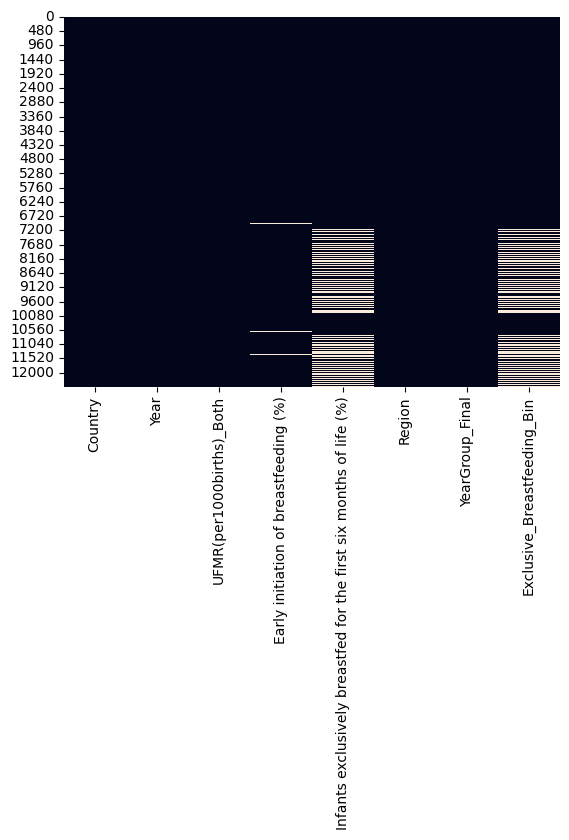

In [119]:
# Check missing data
sns.heatmap(df_filtered.isnull(), cbar=False)

In [120]:
df_cleaned = df_filtered.dropna()

<Axes: >

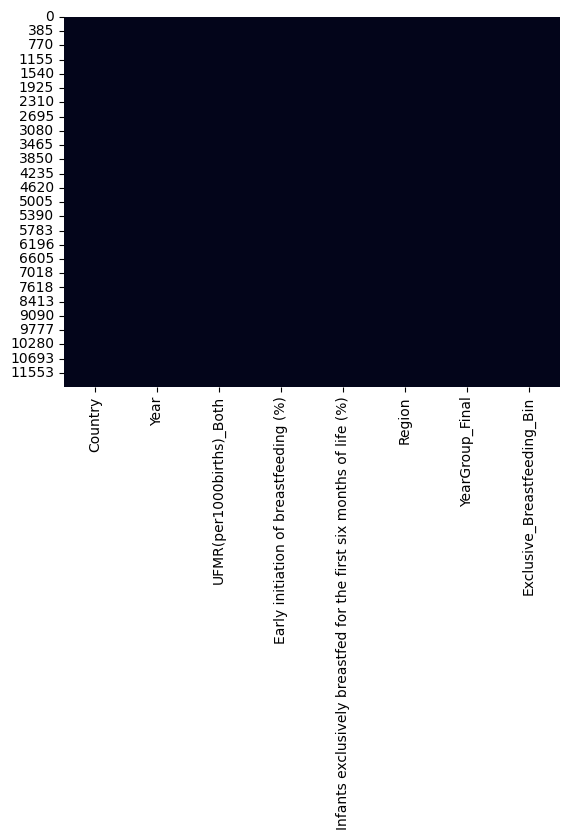

In [121]:
# Check missing data
sns.heatmap(df_cleaned.isnull(), cbar=False)

In [122]:
df_cleaned.shape

(9994, 8)

In [124]:
# Save the file as csv
df_cleaned.to_csv("withoutMissingValues_dataset_v1.0.csv", index=False)

## // End of the section: Tackle the missing values

## // Start of the section: Exploratory data analysis (EDA)


*   Region (by using country)
*   Year
*   Early initiation of breastfeeding (%)
*   Infants exclusively breastfed for the first six months of life (%)
*   UNICEF's target (25 death per 1000 under-five infants)







In [125]:
df = pd.read_csv('withoutMissingValues_dataset_v1.0.csv')
df.head()

,Country,Year,UFMR(per1000births)_Both,Early initiation of breastfeeding (%),Infants exclusively breastfed for the first six months of life (%),Region,YearGroup_Final,Exclusive_Breastfeeding_Bin
0,Algeria,2021,22.34,50.8,50.6,Africa,2018-2021,40-60%
1,Algeria,2020,22.90,50.8,50.6,Africa,2018-2021,40-60%
2,Algeria,2019,23.45,48.0,28.6,Africa,2018-2021,20-40%
3,Algeria,2018,23.98,50.8,50.6,Africa,2018-2021,40-60%
4,Algeria,2017,24.48,50.8,42.9,Africa,2014-2017,40-60%


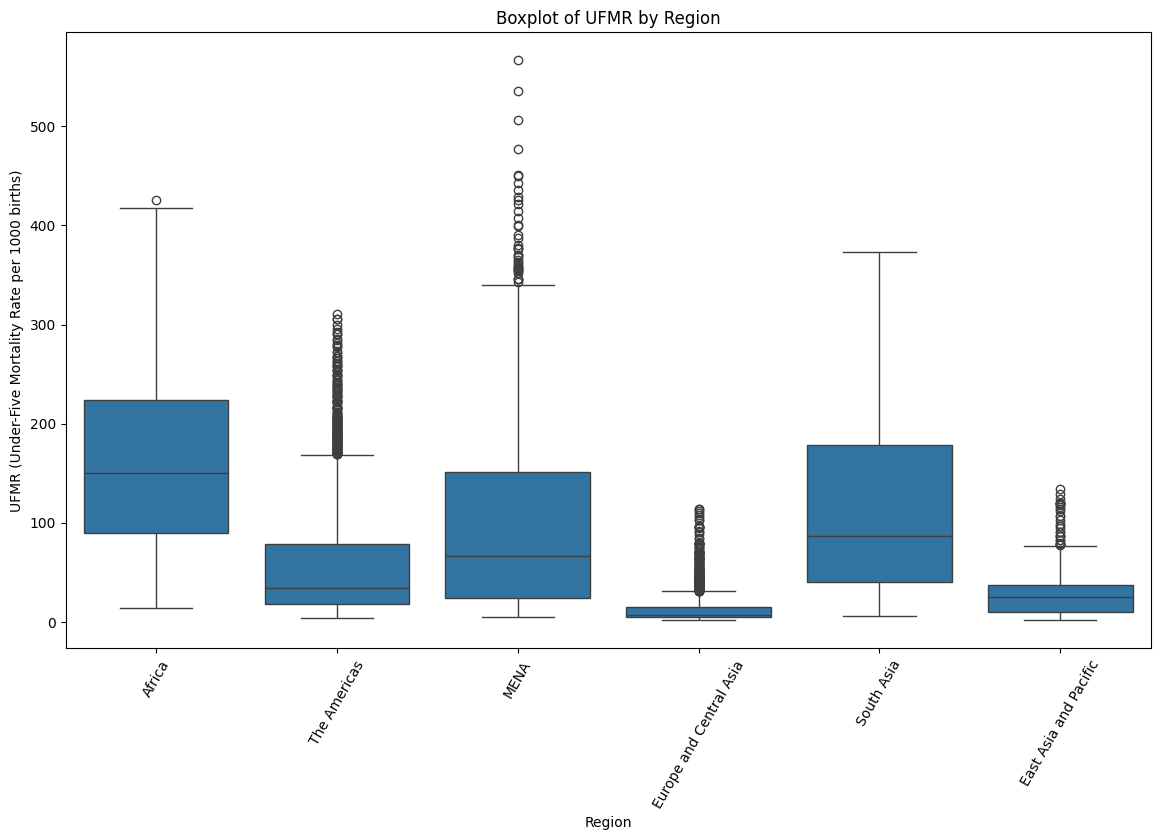

In [126]:
# Box plot - Under-five morality rates for each region

plt.figure(figsize=(14, 8))
sns.boxplot(x='Region', y='UFMR(per1000births)_Both', data=df)
plt.title("Boxplot of UFMR by Region")
plt.xticks(rotation=60)
plt.ylabel("UFMR (Under-Five Mortality Rate per 1000 births)")
plt.xlabel("Region")
plt.show()

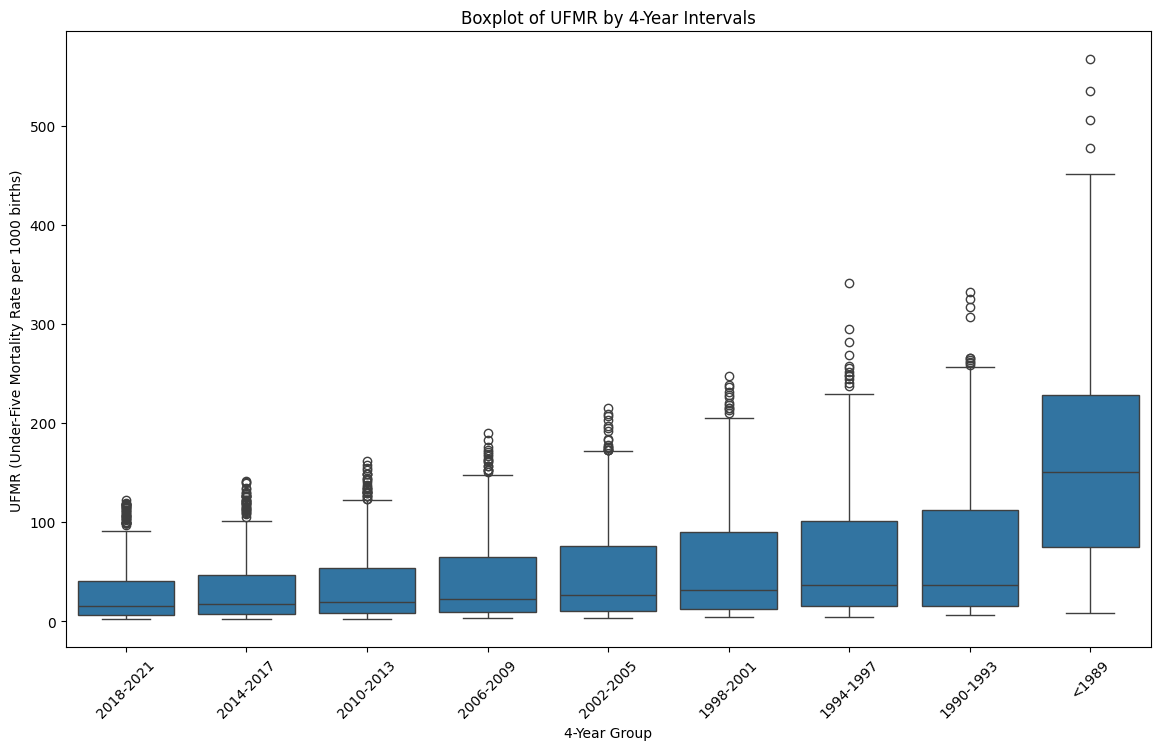

In [127]:
# Box plot - Under-five morality rates for each four year

plt.figure(figsize=(14, 8))
sns.boxplot(x='YearGroup_Final', y='UFMR(per1000births)_Both', data=df)
plt.title("Boxplot of UFMR by 4-Year Intervals")
plt.xticks(rotation=45)
plt.ylabel("UFMR (Under-Five Mortality Rate per 1000 births)")
plt.xlabel("4-Year Group")
plt.show()

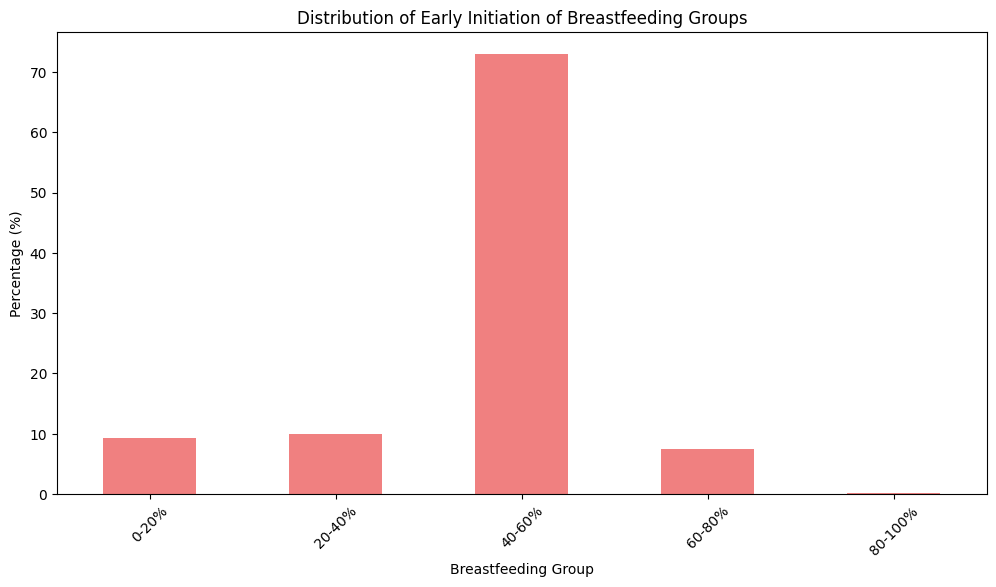

In [128]:
# Group "Early initiation of breastfeeding (%)" into 20% intervals
bins_breastfeeding = [0, 20, 40, 60, 80, 100]  # Divide from 0 to 100 in intervals of 20%
labels_breastfeeding = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']  # Labels for the groups

# Group the data and add a new column
df['Breastfeeding_Group'] = pd.cut(df['Early initiation of breastfeeding (%)'],
                                          bins=bins_breastfeeding, labels=labels_breastfeeding, right=False)

# Calculate the percentage each group represents out of the whole dataset
breastfeeding_group_counts = df['Breastfeeding_Group'].value_counts(normalize=True) * 100

# Visualise with a bar chart
breastfeeding_group_counts.sort_index().plot(kind='bar', figsize=(12, 6), color='lightcoral')
plt.title("Distribution of Early Initiation of Breastfeeding Groups")
plt.ylabel("Percentage (%)")
plt.xlabel("Breastfeeding Group")
plt.xticks(rotation=45)
plt.show()

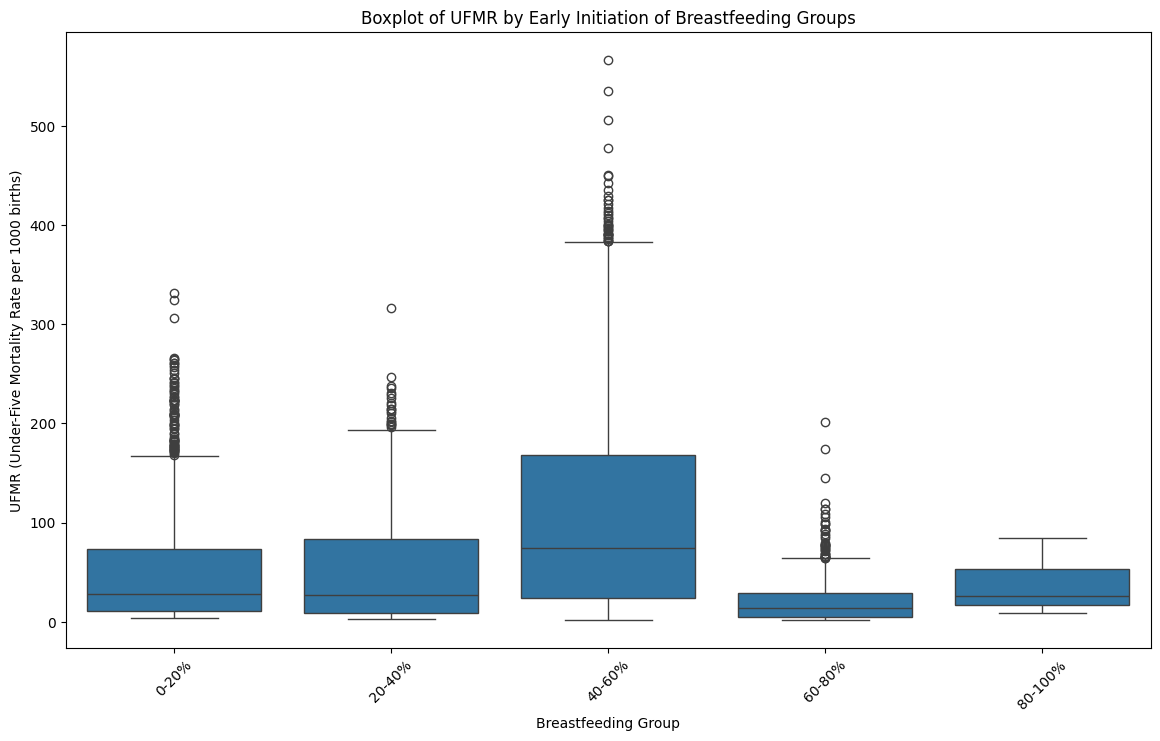

In [129]:
# Create a boxplot of UFMR by breastfeeding groups
plt.figure(figsize=(14, 8))
sns.boxplot(x='Breastfeeding_Group', y='UFMR(per1000births)_Both', data=df)
plt.title("Boxplot of UFMR by Early Initiation of Breastfeeding Groups")
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.ylabel("UFMR (Under-Five Mortality Rate per 1000 births)")
plt.xlabel("Breastfeeding Group")
plt.show()

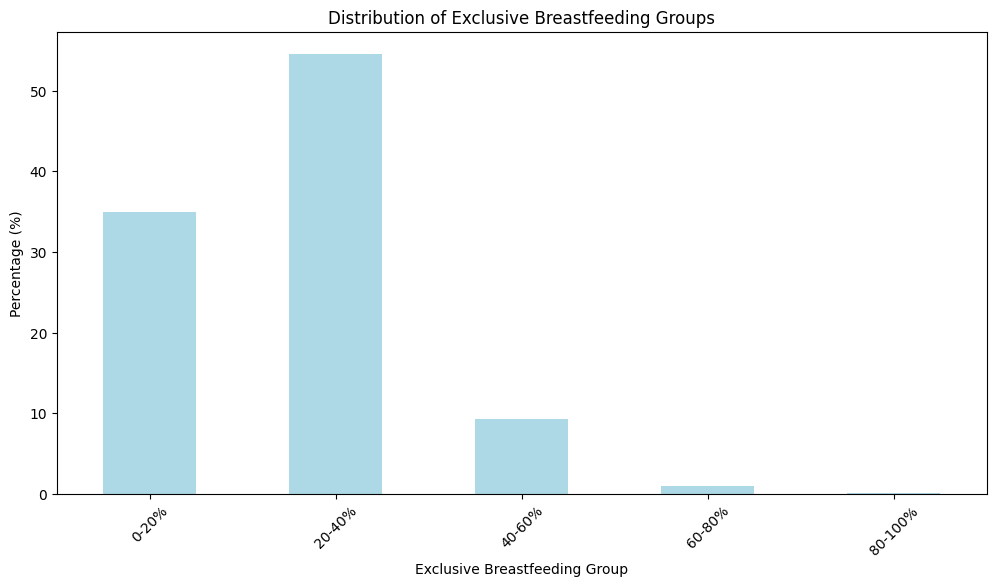

In [130]:
# Group "Infants exclusively breastfed for the first six months of life (%)" into 20% intervals
bins_exclusive = [0, 20, 40, 60, 80, 100]  # Divide from 0 to 100 in intervals of 20%
labels_exclusive = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']  # Labels for the groups

# Group the data and add a new column
df['Exclusive_Breastfeeding_Group'] = pd.cut(df['Infants exclusively breastfed for the first six months of life (%)'],
                                             bins=bins_exclusive, labels=labels_exclusive, right=False)

# Calculate the percentage each group represents out of the whole dataset
exclusive_group_counts = df['Exclusive_Breastfeeding_Group'].value_counts(normalize=True) * 100

# Visualise with a bar chart
exclusive_group_counts.sort_index().plot(kind='bar', figsize=(12, 6), color='lightblue')
plt.title("Distribution of Exclusive Breastfeeding Groups")
plt.ylabel("Percentage (%)")
plt.xlabel("Exclusive Breastfeeding Group")
plt.xticks(rotation=45)
plt.show()

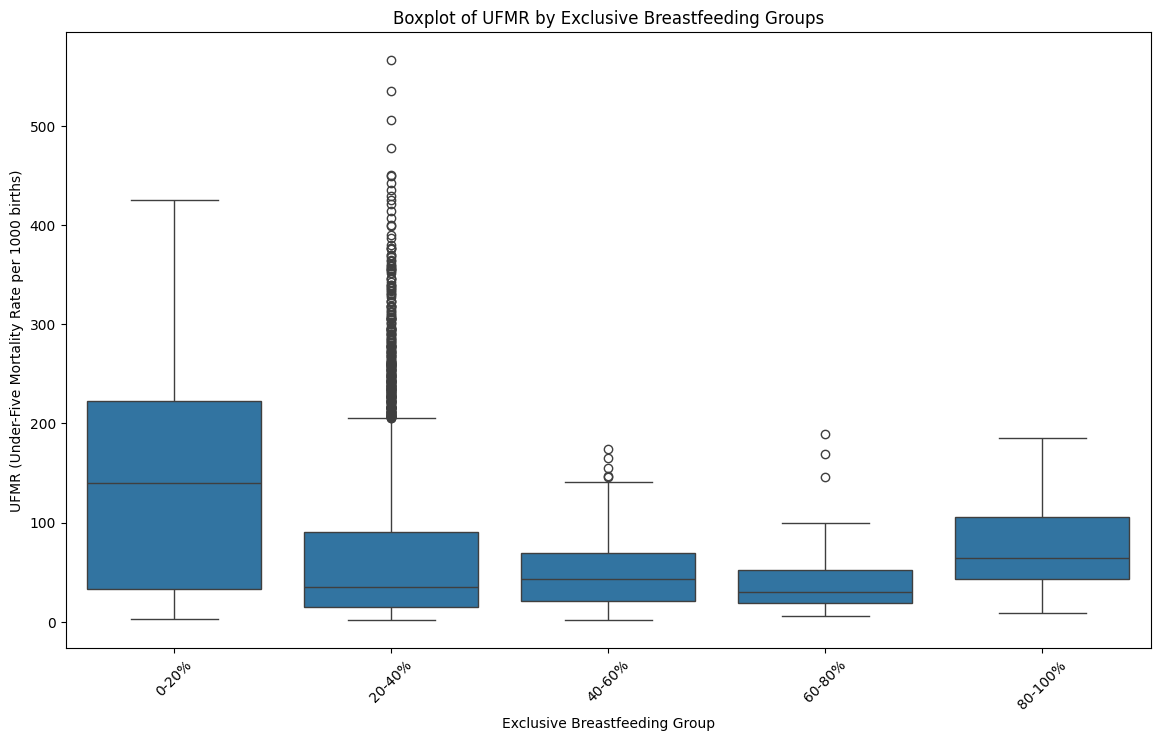

In [131]:
# Create a boxplot of UFMR by exclusive breastfeeding groups
plt.figure(figsize=(14, 8))
sns.boxplot(x='Exclusive_Breastfeeding_Group', y='UFMR(per1000births)_Both', data=df)
plt.title("Boxplot of UFMR by Exclusive Breastfeeding Groups")
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.ylabel("UFMR (Under-Five Mortality Rate per 1000 births)")
plt.xlabel("Exclusive Breastfeeding Group")
plt.show()

In [132]:
# Prepare the target variable based on the UNICEF's target (25 death per 1000 under-five infants)
# Binarizing UFMR into "Target Achieved" and "Target Not Achieved" categories
unicef_labels = ['Target Achieved', 'Target Not Achieved']
df['UFMR_UNICEF_Category'] = pd.cut(df['UFMR(per1000births)_Both'], bins=[0, 25, float('inf')], labels=unicef_labels)

In [133]:
df.head()

,Country,Year,UFMR(per1000births)_Both,Early initiation of breastfeeding (%),Infants exclusively breastfed for the first six months of life (%),Region,YearGroup_Final,Exclusive_Breastfeeding_Bin,Breastfeeding_Group,Exclusive_Breastfeeding_Group,UFMR_UNICEF_Category
0,Algeria,2021,22.34,50.8,50.6,Africa,2018-2021,40-60%,40-60%,40-60%,Target Achieved
1,Algeria,2020,22.90,50.8,50.6,Africa,2018-2021,40-60%,40-60%,40-60%,Target Achieved
2,Algeria,2019,23.45,48.0,28.6,Africa,2018-2021,20-40%,40-60%,20-40%,Target Achieved
3,Algeria,2018,23.98,50.8,50.6,Africa,2018-2021,40-60%,40-60%,40-60%,Target Achieved
4,Algeria,2017,24.48,50.8,42.9,Africa,2014-2017,40-60%,40-60%,40-60%,Target Achieved


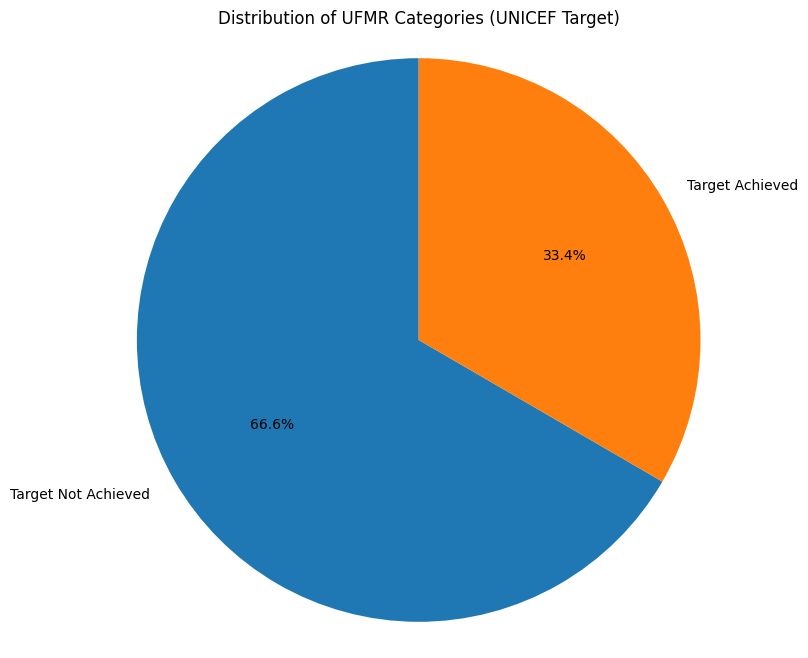

In [134]:
# Calculate the value counts for the 'UFMR_UNICEF_Category' column
category_counts = df['UFMR_UNICEF_Category'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of UFMR Categories (UNICEF Target)")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [135]:
# Save the file as csv (This file is a deliverable.)
df.to_csv("Dataset_for_ML_v1.1.csv", index=False)

## // End of the section: EDA

## // Start of the section: Building ANN for the binary classification

In [136]:
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.models import Sequential
from keras.layers import Dense

In [137]:
# データの読み込み
df = pd.read_csv("Dataset_for_ML_v1.1.csv")

In [138]:
df.head()

,Country,Year,UFMR(per1000births)_Both,Early initiation of breastfeeding (%),Infants exclusively breastfed for the first six months of life (%),Region,YearGroup_Final,Exclusive_Breastfeeding_Bin,Breastfeeding_Group,Exclusive_Breastfeeding_Group,UFMR_UNICEF_Category
0,Algeria,2021,22.34,50.8,50.6,Africa,2018-2021,40-60%,40-60%,40-60%,Target Achieved
1,Algeria,2020,22.90,50.8,50.6,Africa,2018-2021,40-60%,40-60%,40-60%,Target Achieved
2,Algeria,2019,23.45,48.0,28.6,Africa,2018-2021,20-40%,40-60%,20-40%,Target Achieved
3,Algeria,2018,23.98,50.8,50.6,Africa,2018-2021,40-60%,40-60%,40-60%,Target Achieved
4,Algeria,2017,24.48,50.8,42.9,Africa,2014-2017,40-60%,40-60%,40-60%,Target Achieved


In [139]:
# Step 1: One-hot encode the 'Region' feature
df_encoded_ann = pd.get_dummies(df, columns=['Region'], drop_first=True)

In [140]:
# Step 2: Define features (X) and target (y)
# Selecting features for the ANN model and setting target labels
features_ann = ['Year', 'Early initiation of breastfeeding (%)', 'Infants exclusively breastfed for the first six months of life (%)'] + \
               [col for col in df_encoded_ann.columns if col.startswith("Region_")]
X_ann = df_encoded_ann[features_ann]
y_ann = df_encoded_ann['UFMR_UNICEF_Category']

In [141]:
# Step 3: Convert target labels into binary values (0: Target Achieved, 1: Target Not Achieved)
y_ann = y_ann.map({'Target Achieved': 0, 'Target Not Achieved': 1}).astype(int)

In [142]:
# Step 4: Split the dataset into training and test sets (80% train, 20% test)
X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(X_ann, y_ann, test_size=0.2, random_state=42)

In [143]:
# Step 5: Standardise the features for better ANN training
scaler = StandardScaler()
X_train_ann = scaler.fit_transform(X_train_ann)
X_test_ann = scaler.transform(X_test_ann)

In [144]:
# Step 6: Build an ANN model function with customisable hidden layers
def build_model_1():
    model = Sequential()
    model.add(Dense(24, input_dim=X_train_ann.shape[1], activation='relu'))  # Input layer and one hidden layer with 24 nodes
    model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid for binary classification
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # Compile the model
    return model

In [145]:
# Step 7: K-Fold Cross-Validation function to evaluate the model using macro average metrics
def evaluate_model_with_kfold_macro(X_train, y_train, model_fn, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)  # 5-fold cross-validation
    fold_accuracies, fold_precisions, fold_recalls, fold_f1_scores = [], [], [], []  # Lists to store metrics for each fold

    for train_index, val_index in kf.split(X_train):
        # Split data into training and validation sets for this fold
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Build and train the model for the current fold
        model = model_fn()
        model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=10, verbose=0)

        # Make predictions and calculate metrics using macro average
        y_val_pred_prob = model.predict(X_val_fold)
        y_val_pred = (y_val_pred_prob > 0.5).astype(int)

        # Collect metrics
        fold_accuracies.append(accuracy_score(y_val_fold, y_val_pred))
        fold_precisions.append(precision_score(y_val_fold, y_val_pred, average='macro'))
        fold_recalls.append(recall_score(y_val_fold, y_val_pred, average='macro'))
        fold_f1_scores.append(f1_score(y_val_fold, y_val_pred, average='macro'))

    # Step 8: Display results per fold and average metrics across folds
    print("Fold-wise Results (Macro Average):")
    for i in range(n_splits):
        print(f"Fold {i+1}: Accuracy={fold_accuracies[i]:.4f}, Precision={fold_precisions[i]:.4f}, Recall={fold_recalls[i]:.4f}, F1-Score={fold_f1_scores[i]:.4f}")

    print("\nAverage Results Across Folds (Macro Average):")
    print(f"Accuracy: {np.mean(fold_accuracies):.4f}")
    print(f"Precision: {np.mean(fold_precisions):.4f}")
    print(f"Recall: {np.mean(fold_recalls):.4f}")
    print(f"F1-Score: {np.mean(fold_f1_scores):.4f}")

    # Return all results
    return {
        'accuracy': fold_accuracies,
        'precision': fold_precisions,
        'recall': fold_recalls,
        'f1_score': fold_f1_scores,
        'mean_accuracy': np.mean(fold_accuracies),
        'mean_precision': np.mean(fold_precisions),
        'mean_recall': np.mean(fold_recalls),
        'mean_f1_score': np.mean(fold_f1_scores)
    }


In [146]:
# Step 9: Evaluate Model 1 using K-Fold Cross-Validation with Macro Average metrics
model_1_results = evaluate_model_with_kfold_macro(X_train_ann, y_train_ann, build_model_1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Fold-wise Results (Macro Average):
Fold 1: Accuracy=0.8399, Precision=0.8217, Recall=0.8313, F1-Score=0.8259
Fold 2: Accuracy=0.8349, Precision=0.8090, Recall=0.8219, F1-Score=0.8146
Fold 3: Accuracy=0.8587, Precision=0.8398, Recall=0.8476, F1-Score=0.8434
Fold 4: Accuracy=0.8505, Precision=0.8301, Recall=0.8432, F1-Score=0.8357
Fold 5: Accuracy=0.8505, Precision=0.8321, Recall=0.8286, F1-Score=0.8303

Average Results Across Folds (Macro Average):
Accuracy: 0.8469
Precision: 0.8266
Recall: 0.8345
F1-Score: 0.8300


In [147]:
# Step 10: Train final model on full training data
final_model = build_model_1()
final_model.fit(X_train_ann, y_train_ann, epochs=50, batch_size=10, verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [148]:
# Step 11: Evaluate on test data (20% test set)
y_test_pred_prob = final_model.predict(X_test_ann)
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

# Compute test metrics (on 20% test data)
test_accuracy = accuracy_score(y_test_ann, y_test_pred)
test_precision = precision_score(y_test_ann, y_test_pred, average='macro')
test_recall = recall_score(y_test_ann, y_test_pred, average='macro')
test_f1 = f1_score(y_test_ann, y_test_pred, average='macro')

print("\nTest Data Results (Macro Average on 20% test set):")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1:.4f}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Test Data Results (Macro Average on 20% test set):
Accuracy: 0.8554
Precision: 0.8352
Recall: 0.8466
F1-Score: 0.8403


## // End of the section: Building ANN for the binary classification

# // EOF